EDA Analysis

First few rows of the dataset:
   Creativity  Intellectual Curiosity  Preference for Novelty  \
0         4.0                     1.0                     5.0   
1         3.0                     5.0                     3.0   
2         2.0                     3.0                     4.0   
3         2.0                     2.0                     2.0   
4         3.0                     3.0                     3.0   

   Openness to Diverse Cultures  Artistic Interests  Organizational Skills  \
0                           2.0                 5.0                    1.0   
1                           4.0                 3.0                    3.0   
2                           4.0                 3.0                    2.0   
3                           3.0                 4.0                    2.0   
4                           3.0                 5.0                    3.0   

   Reliability  Punctuality  Attention to Detail  Work Ethic  ...  \
0          5.0          2.0             

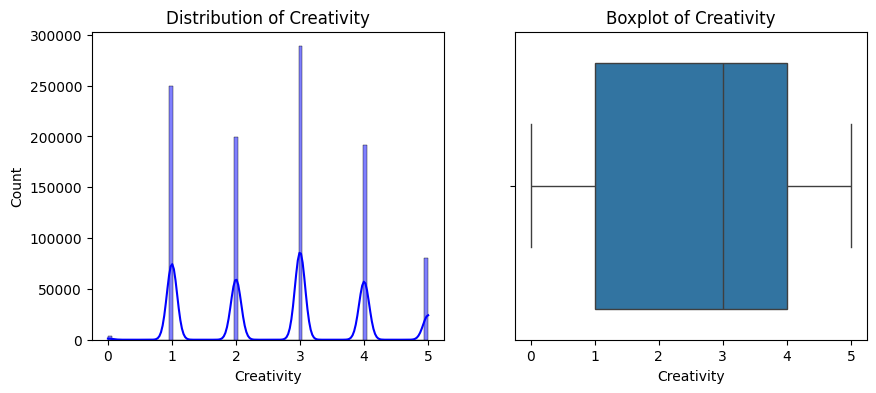

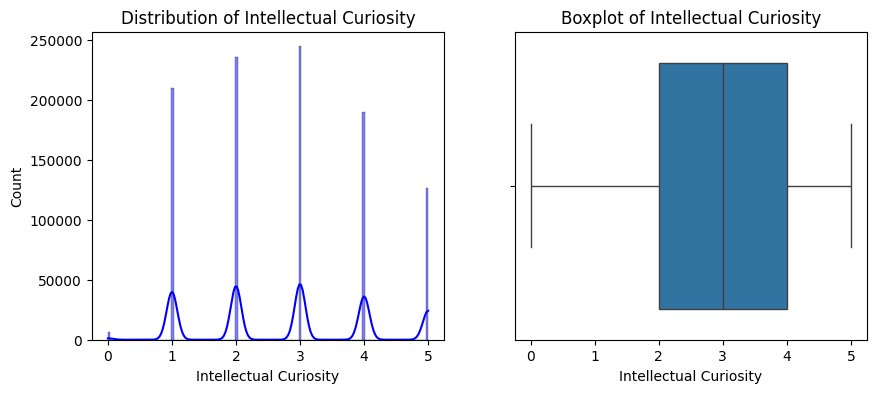

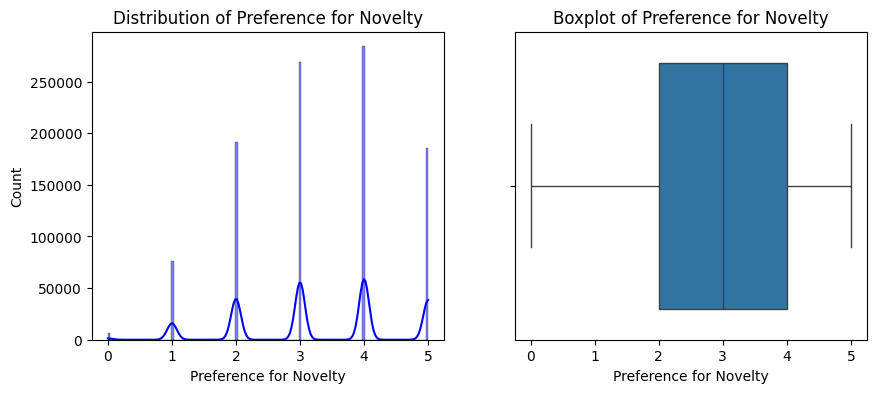

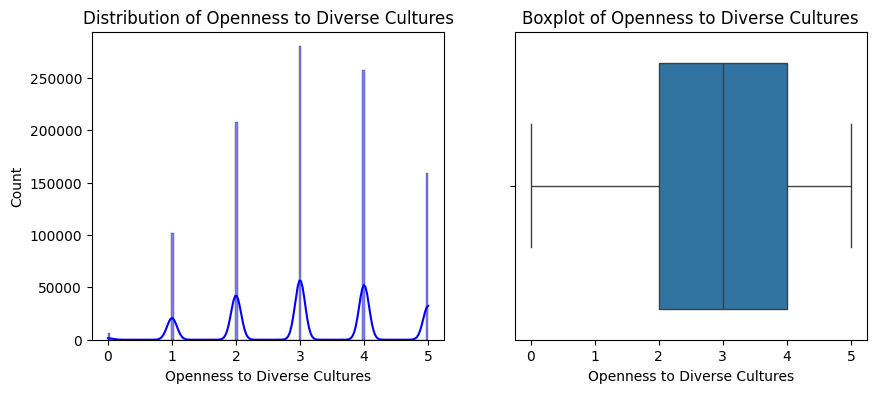

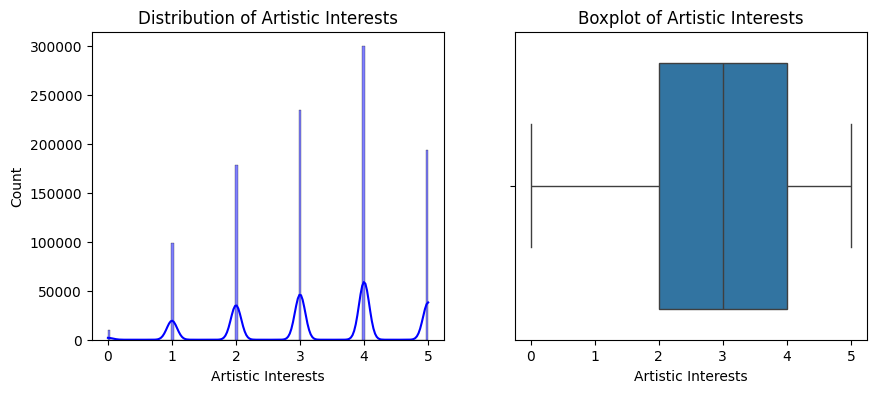

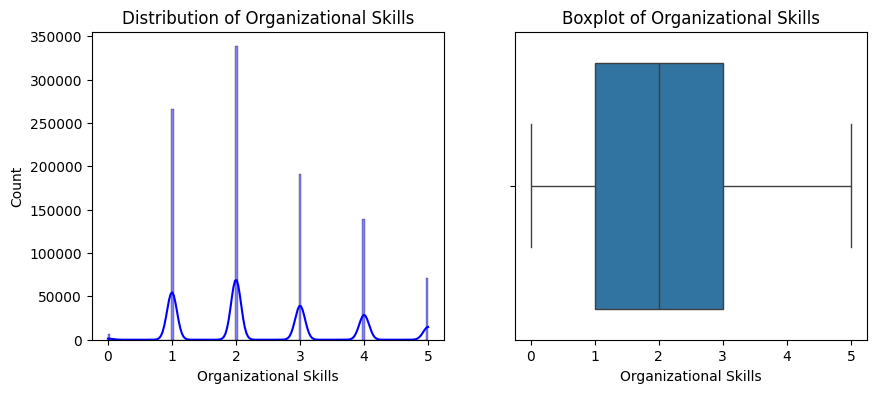

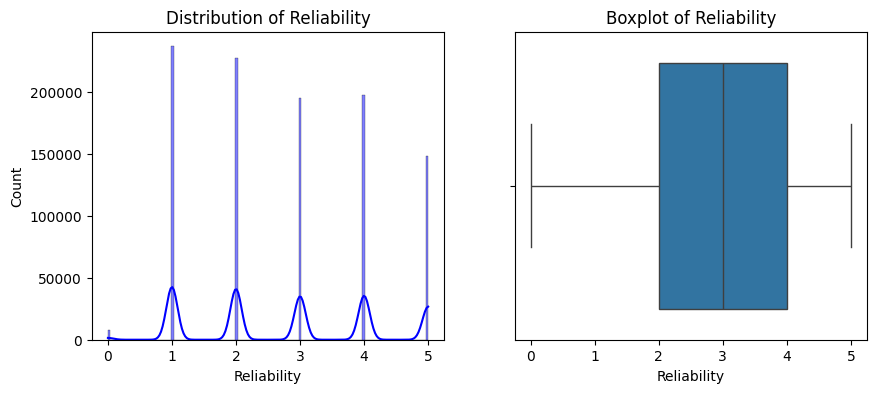

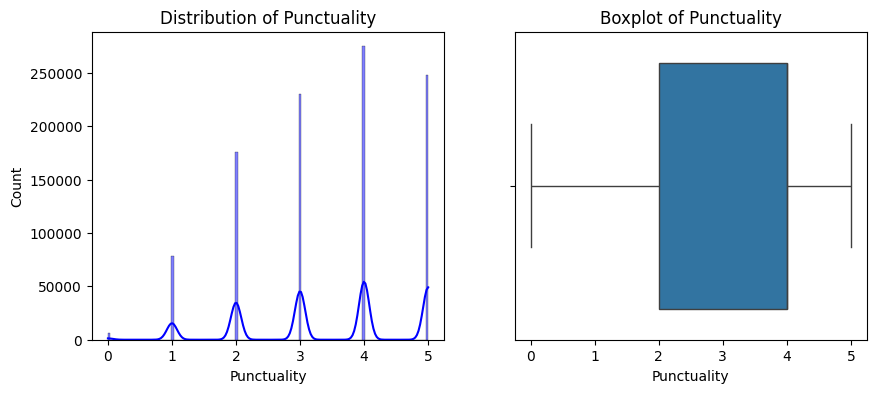

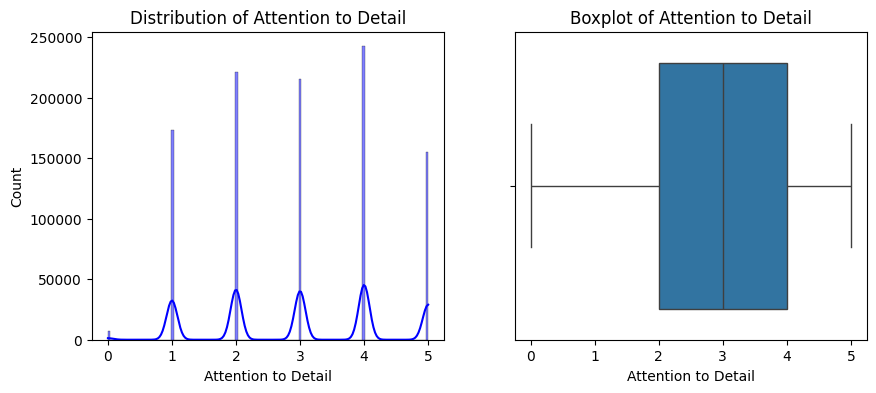

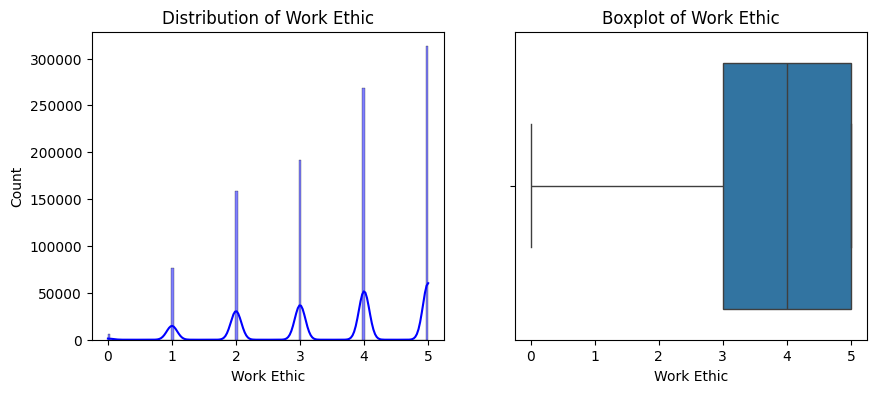

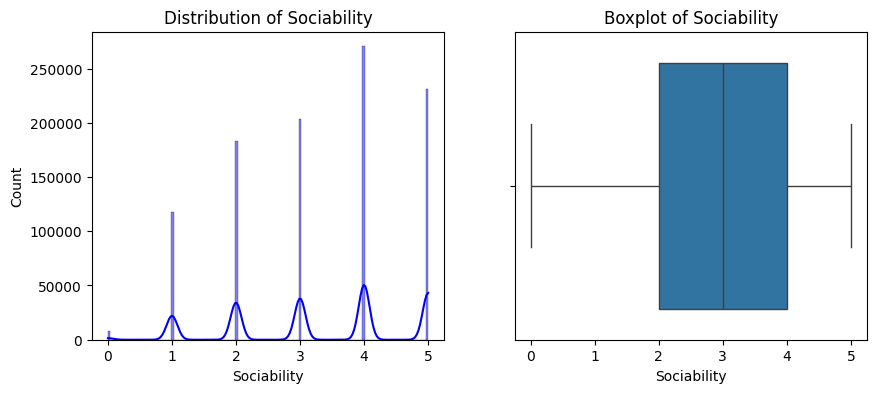

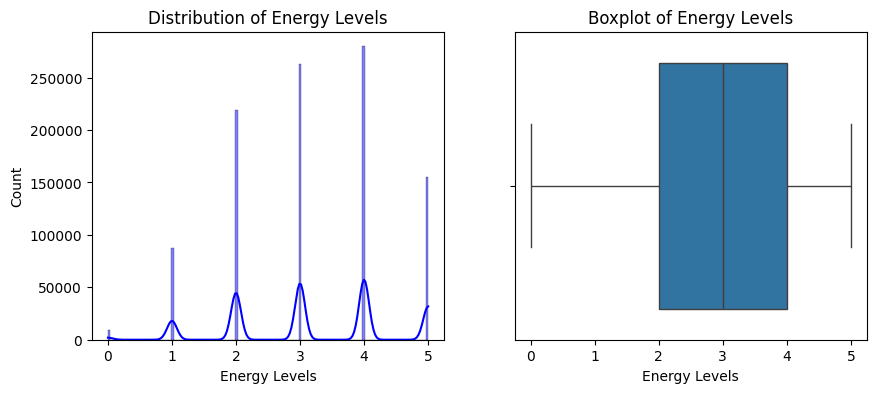

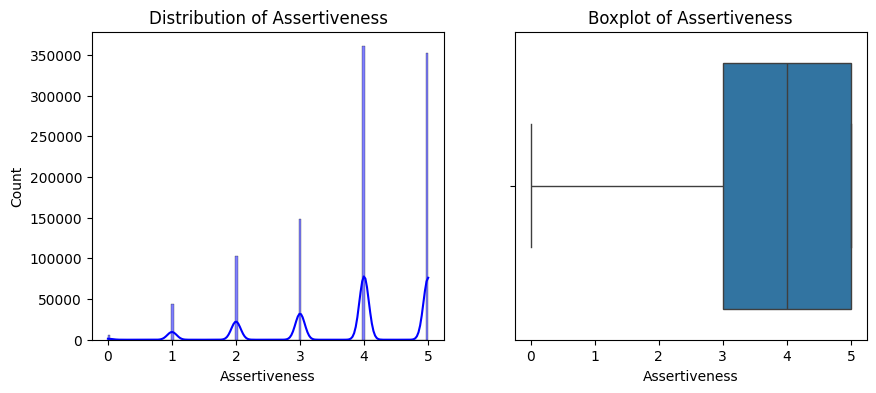

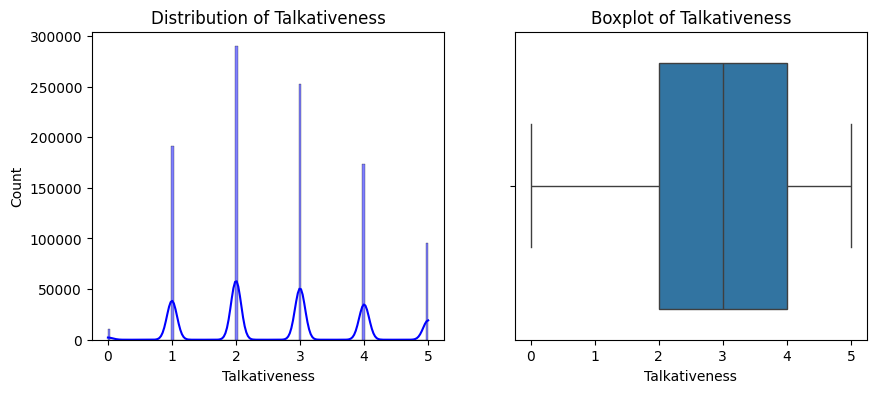

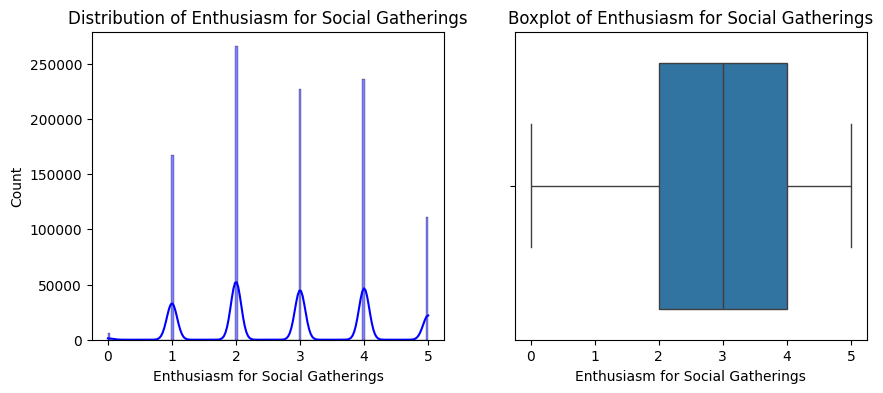

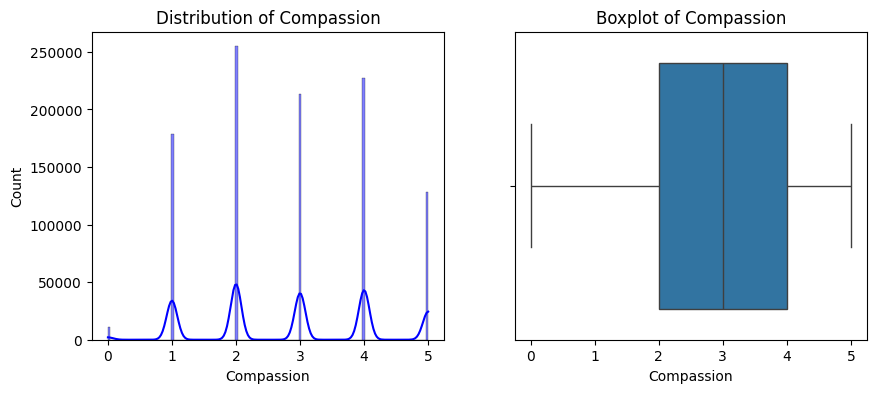

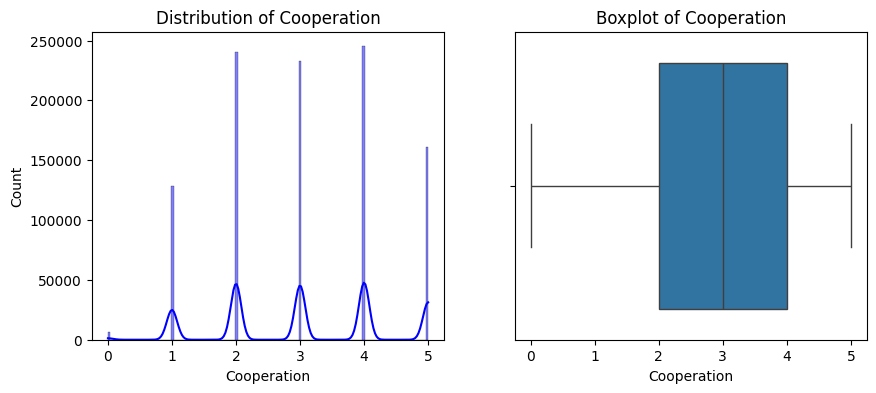

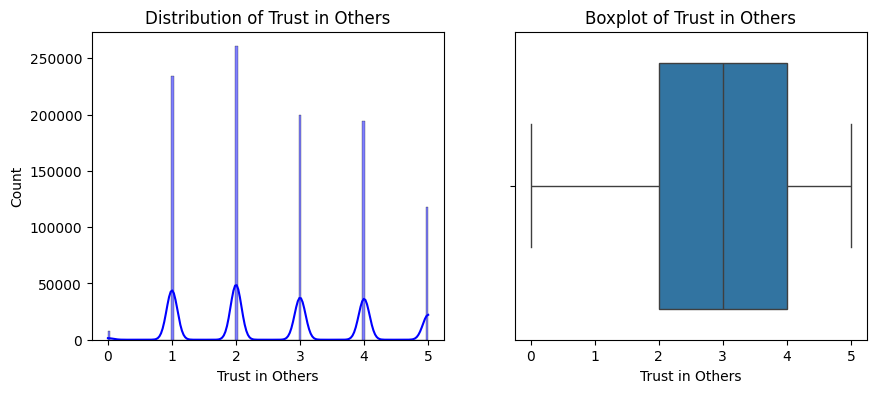

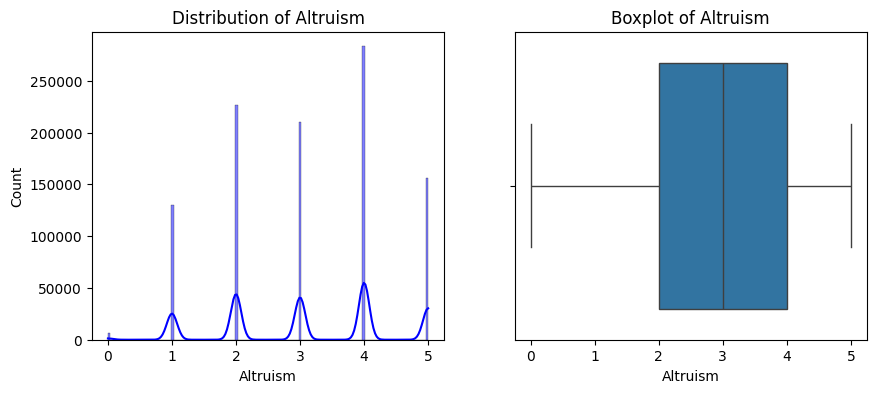

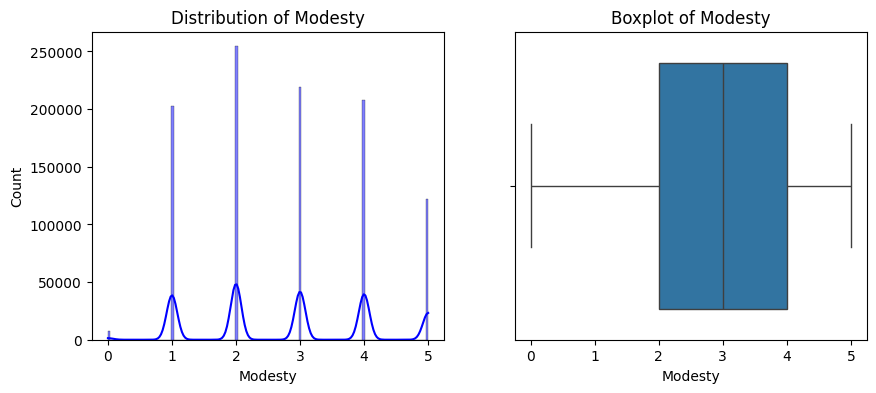

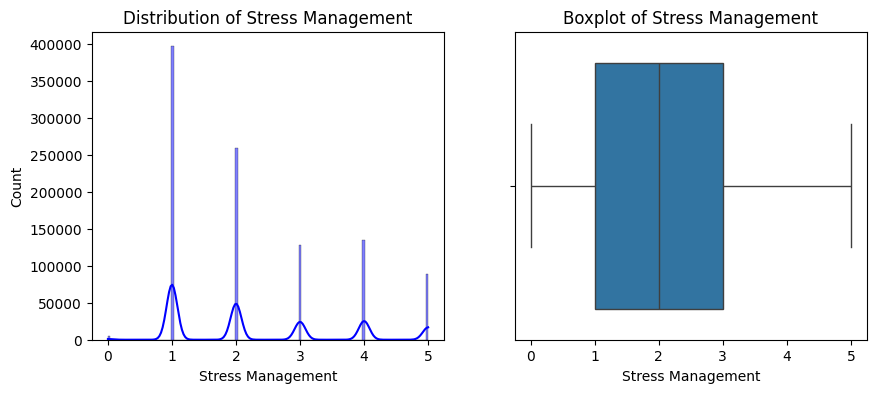

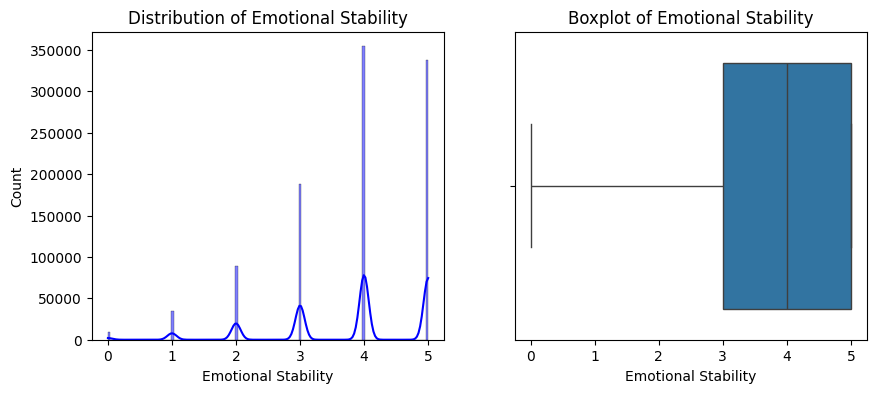

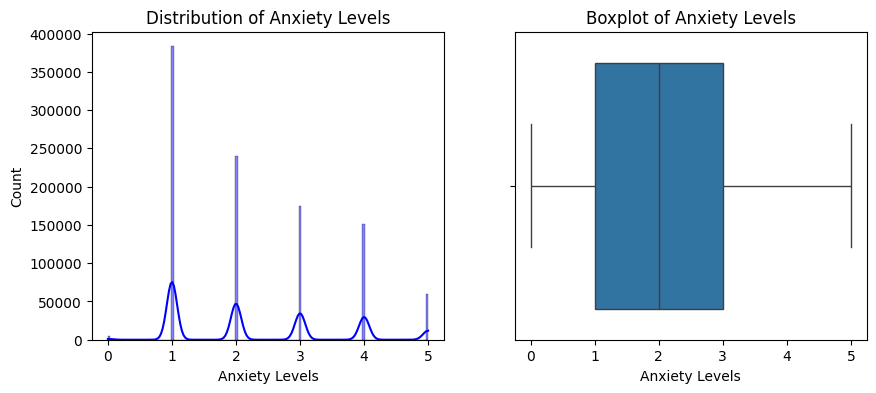

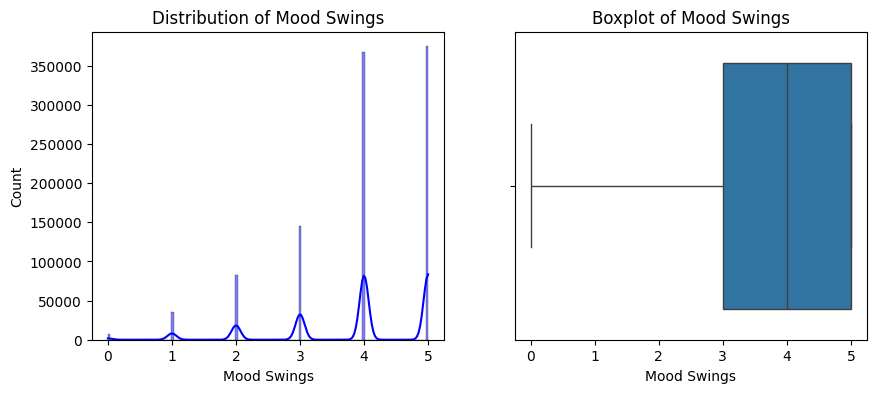

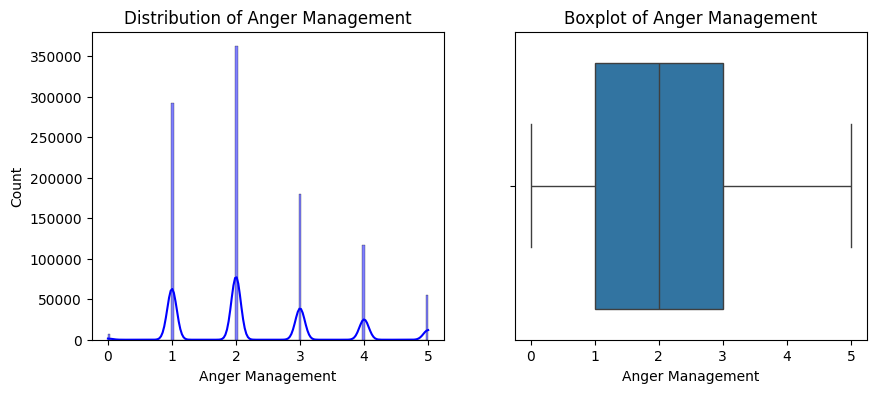

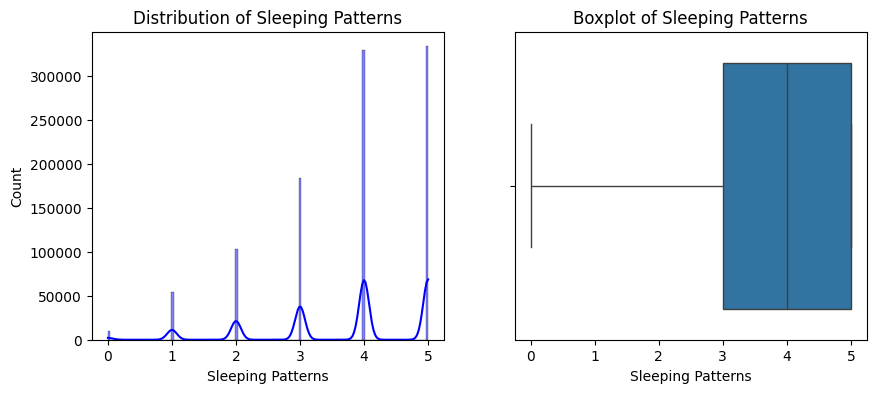

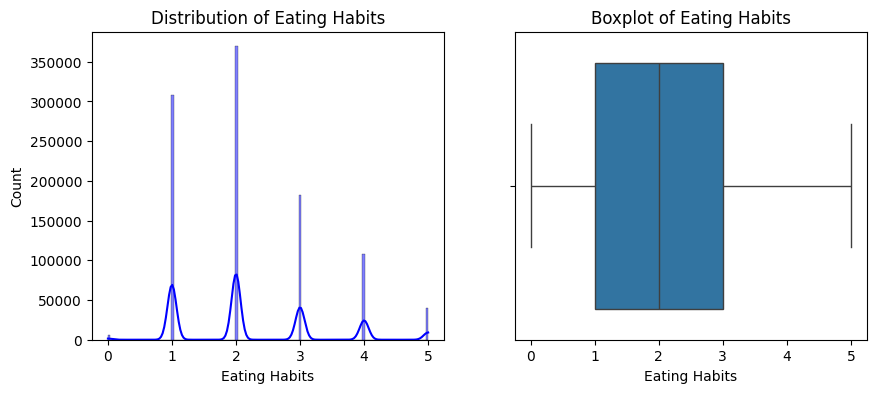

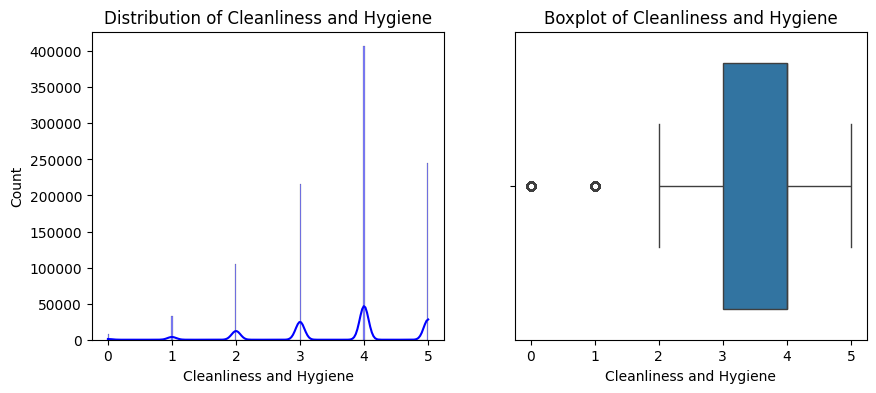

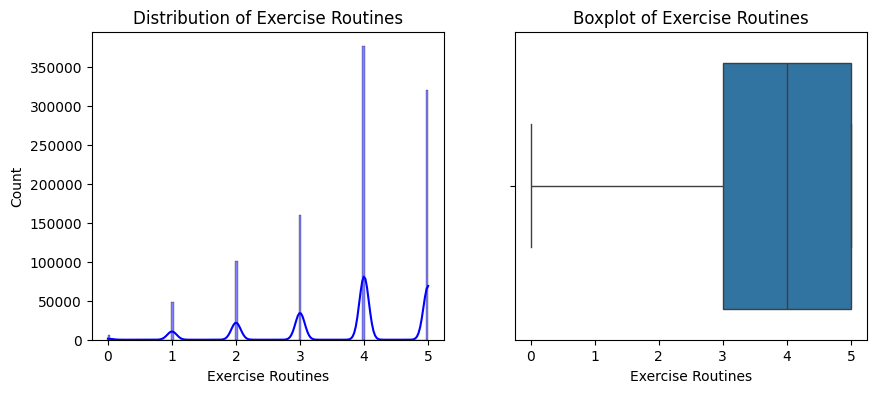

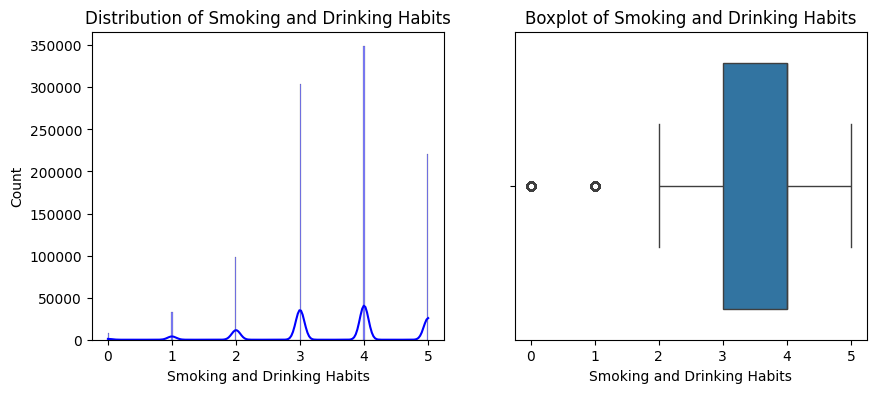

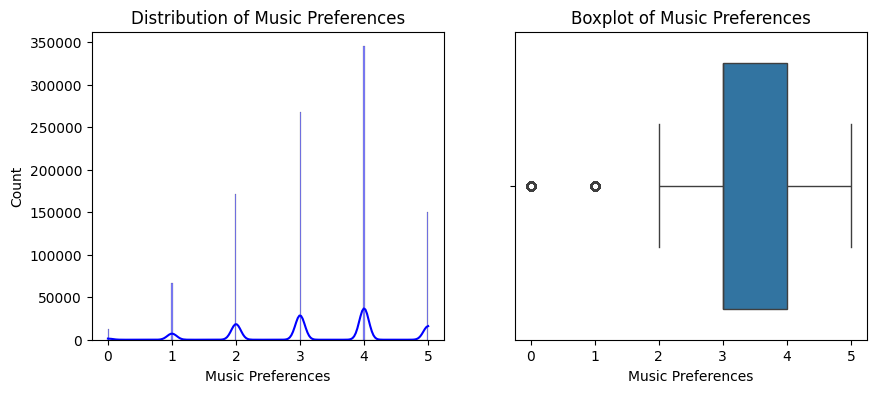

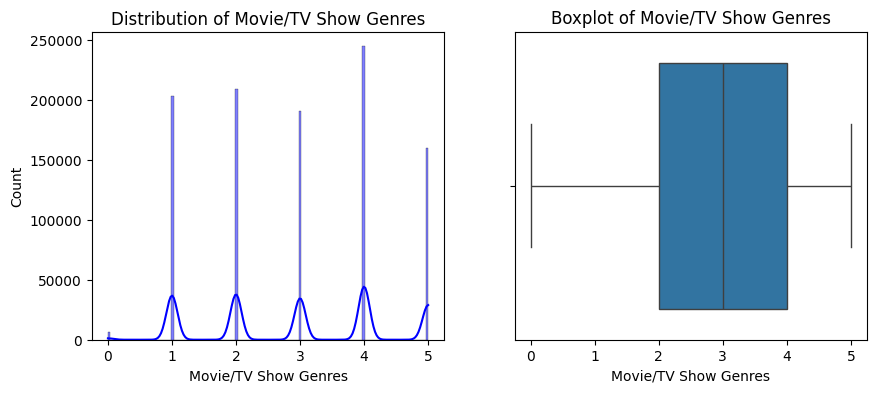

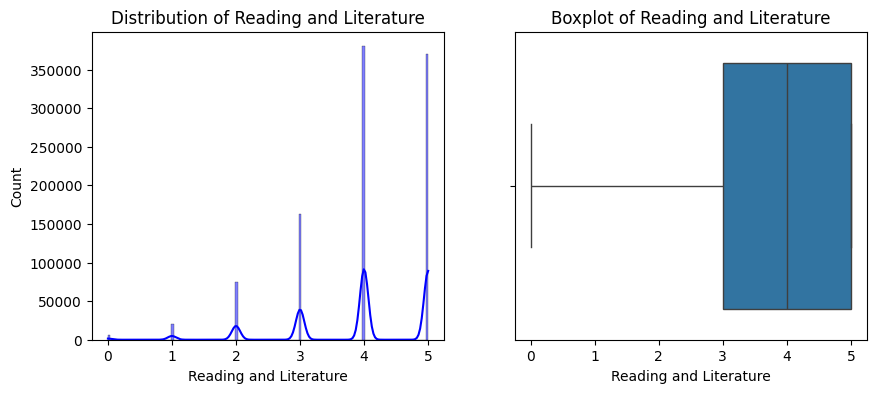

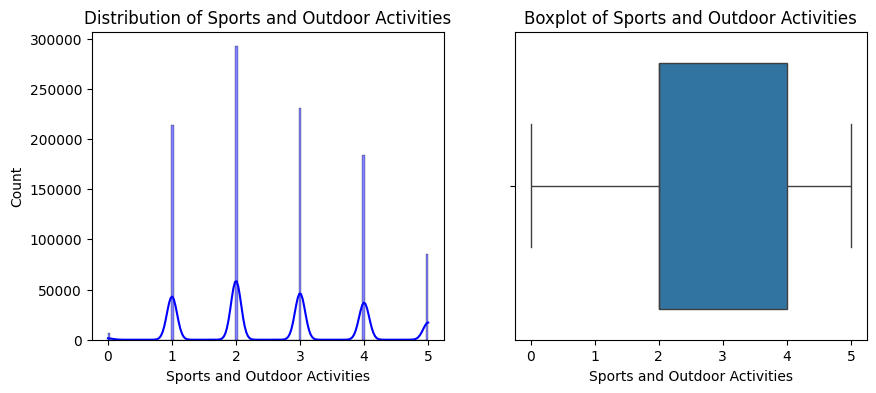

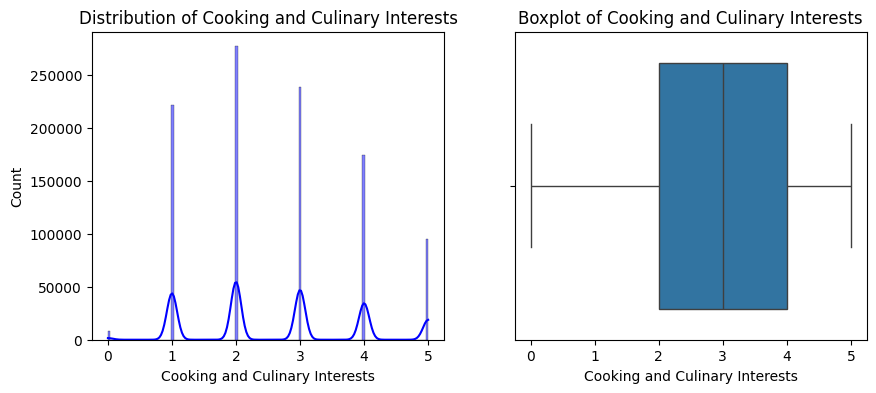

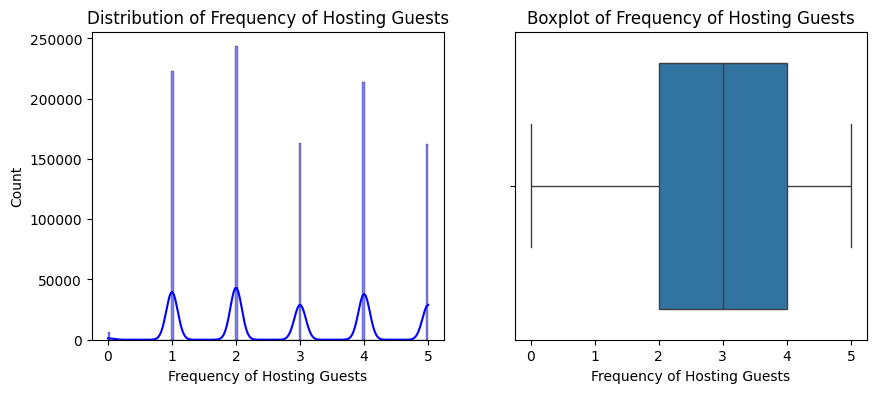

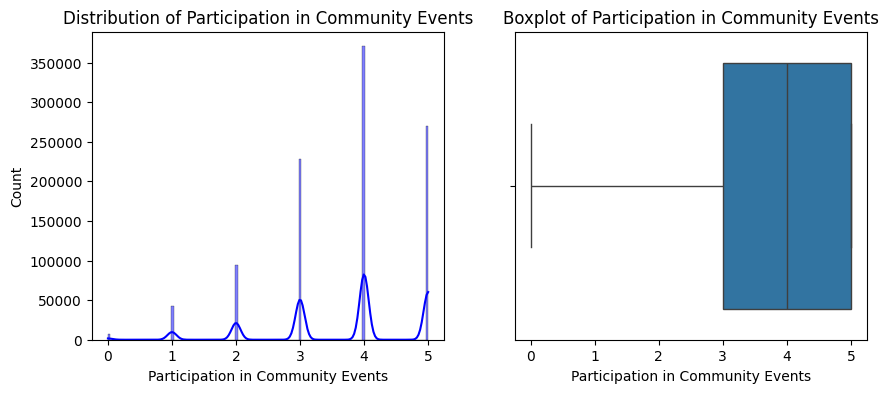

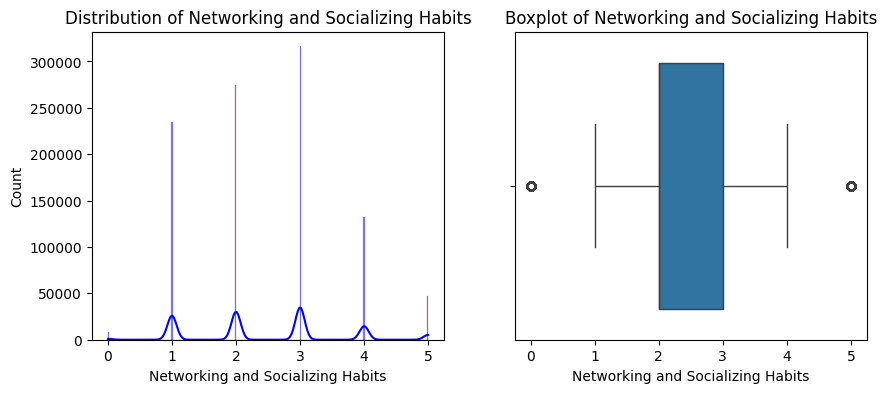

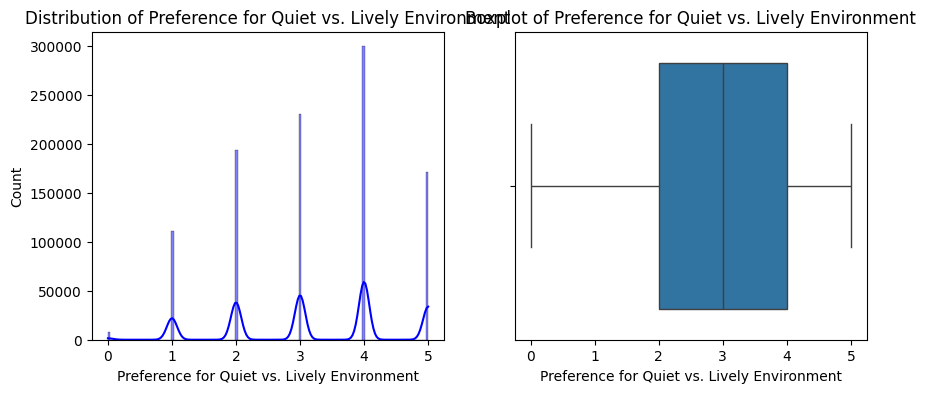

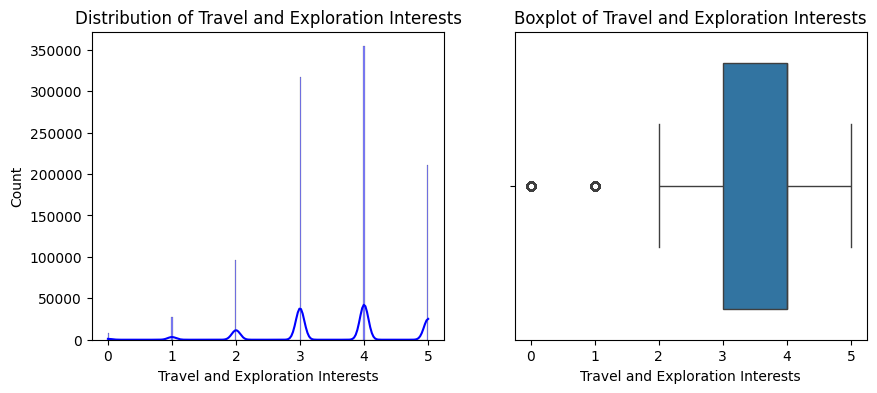

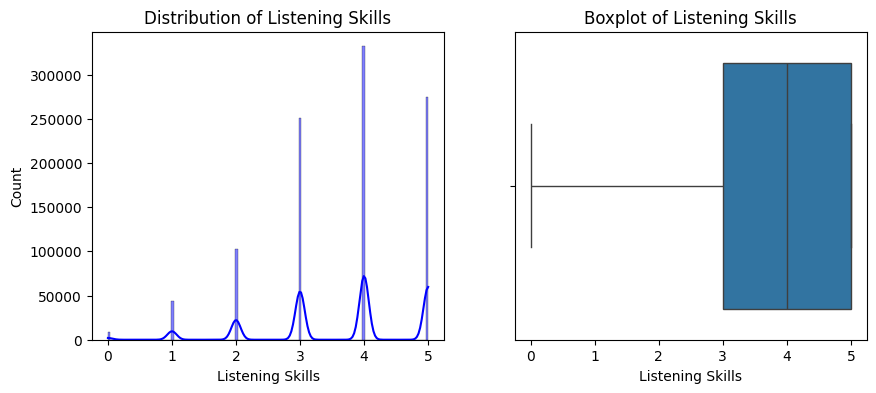

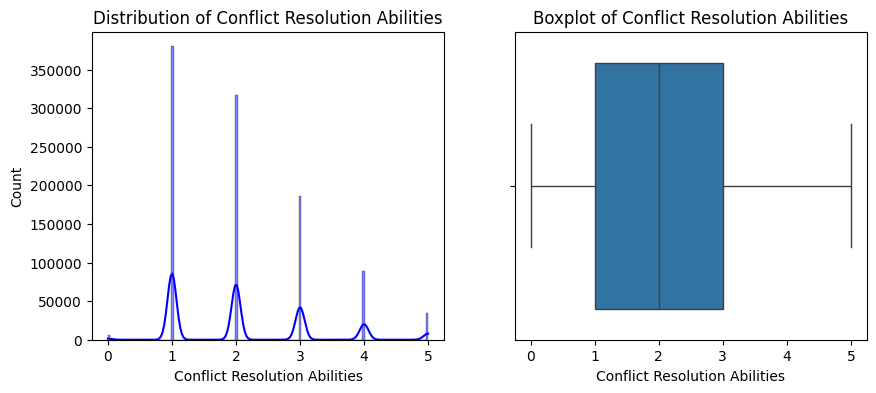

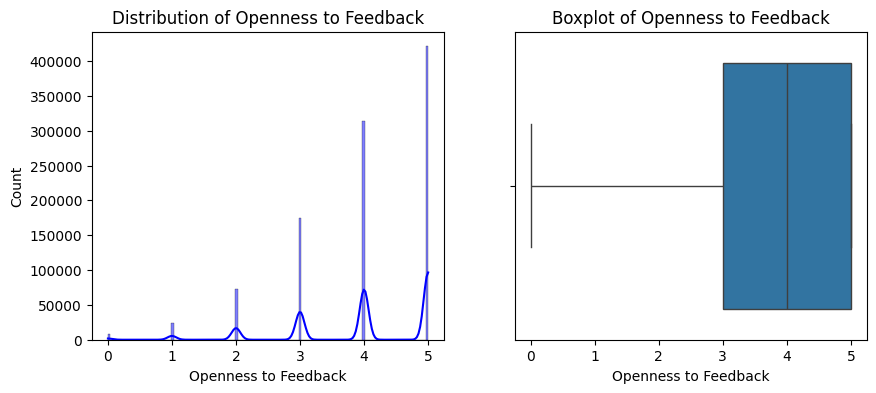

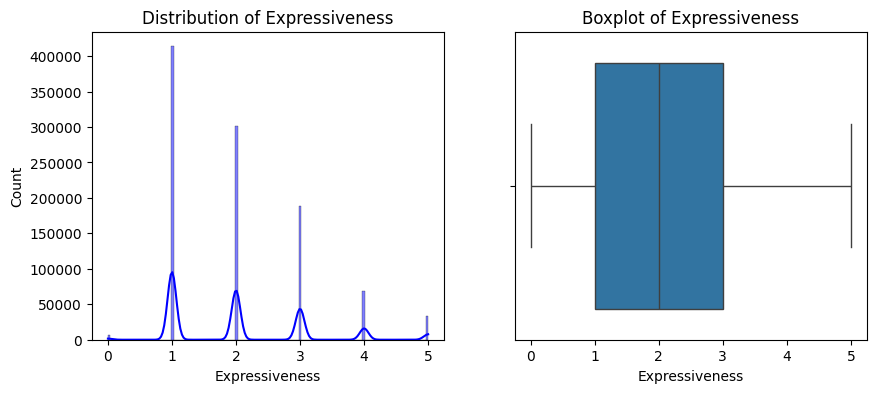

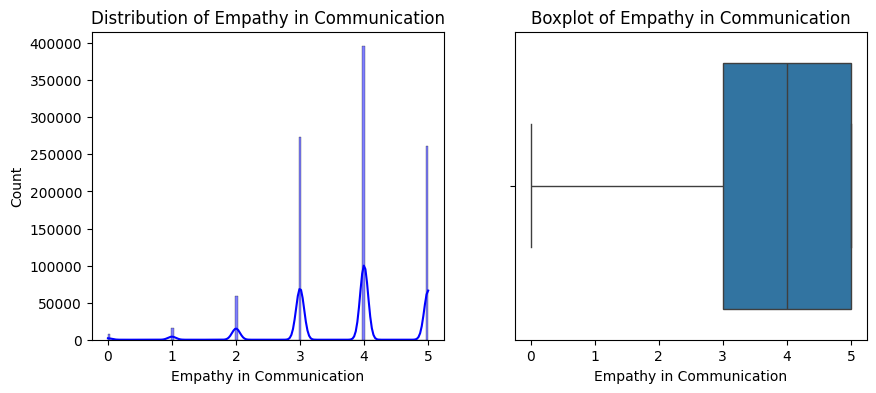

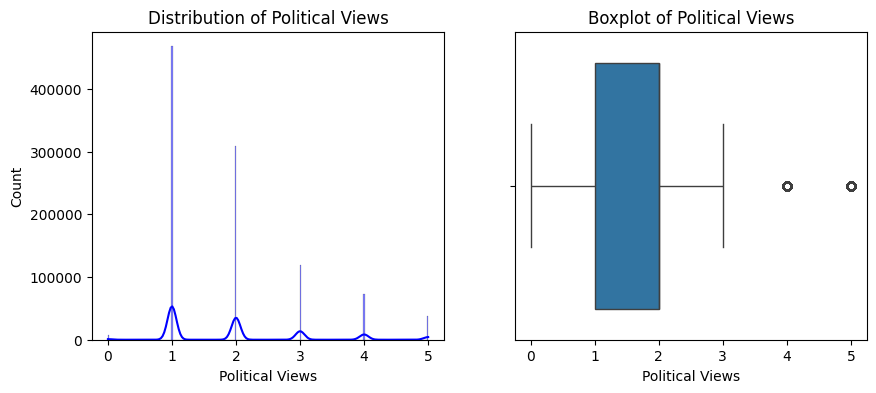

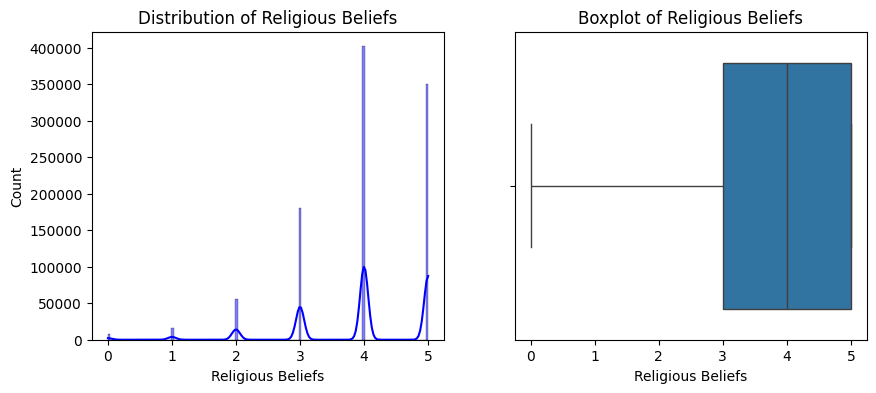

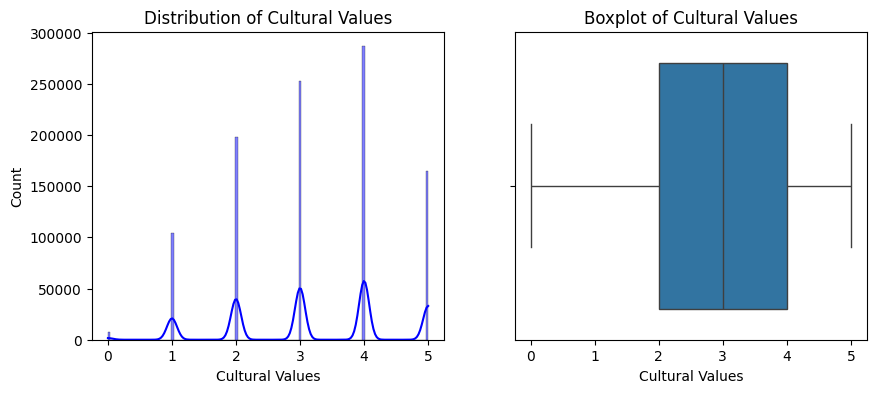

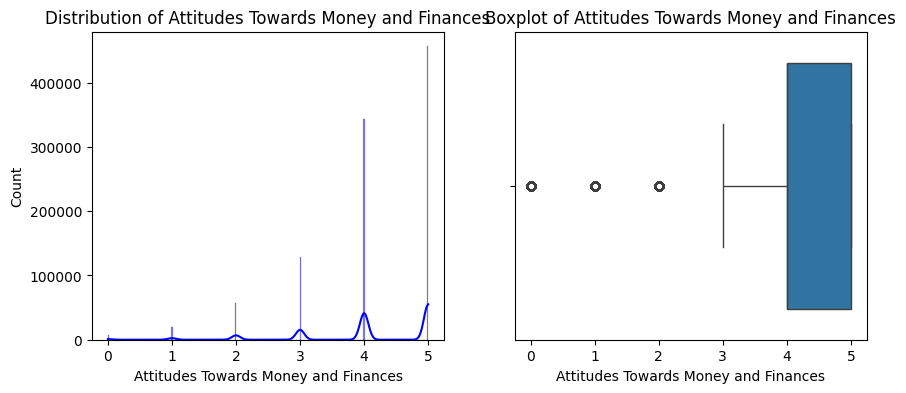

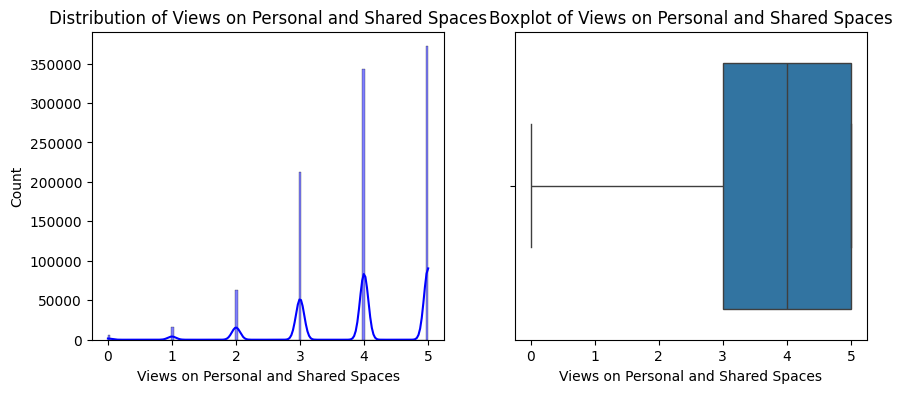

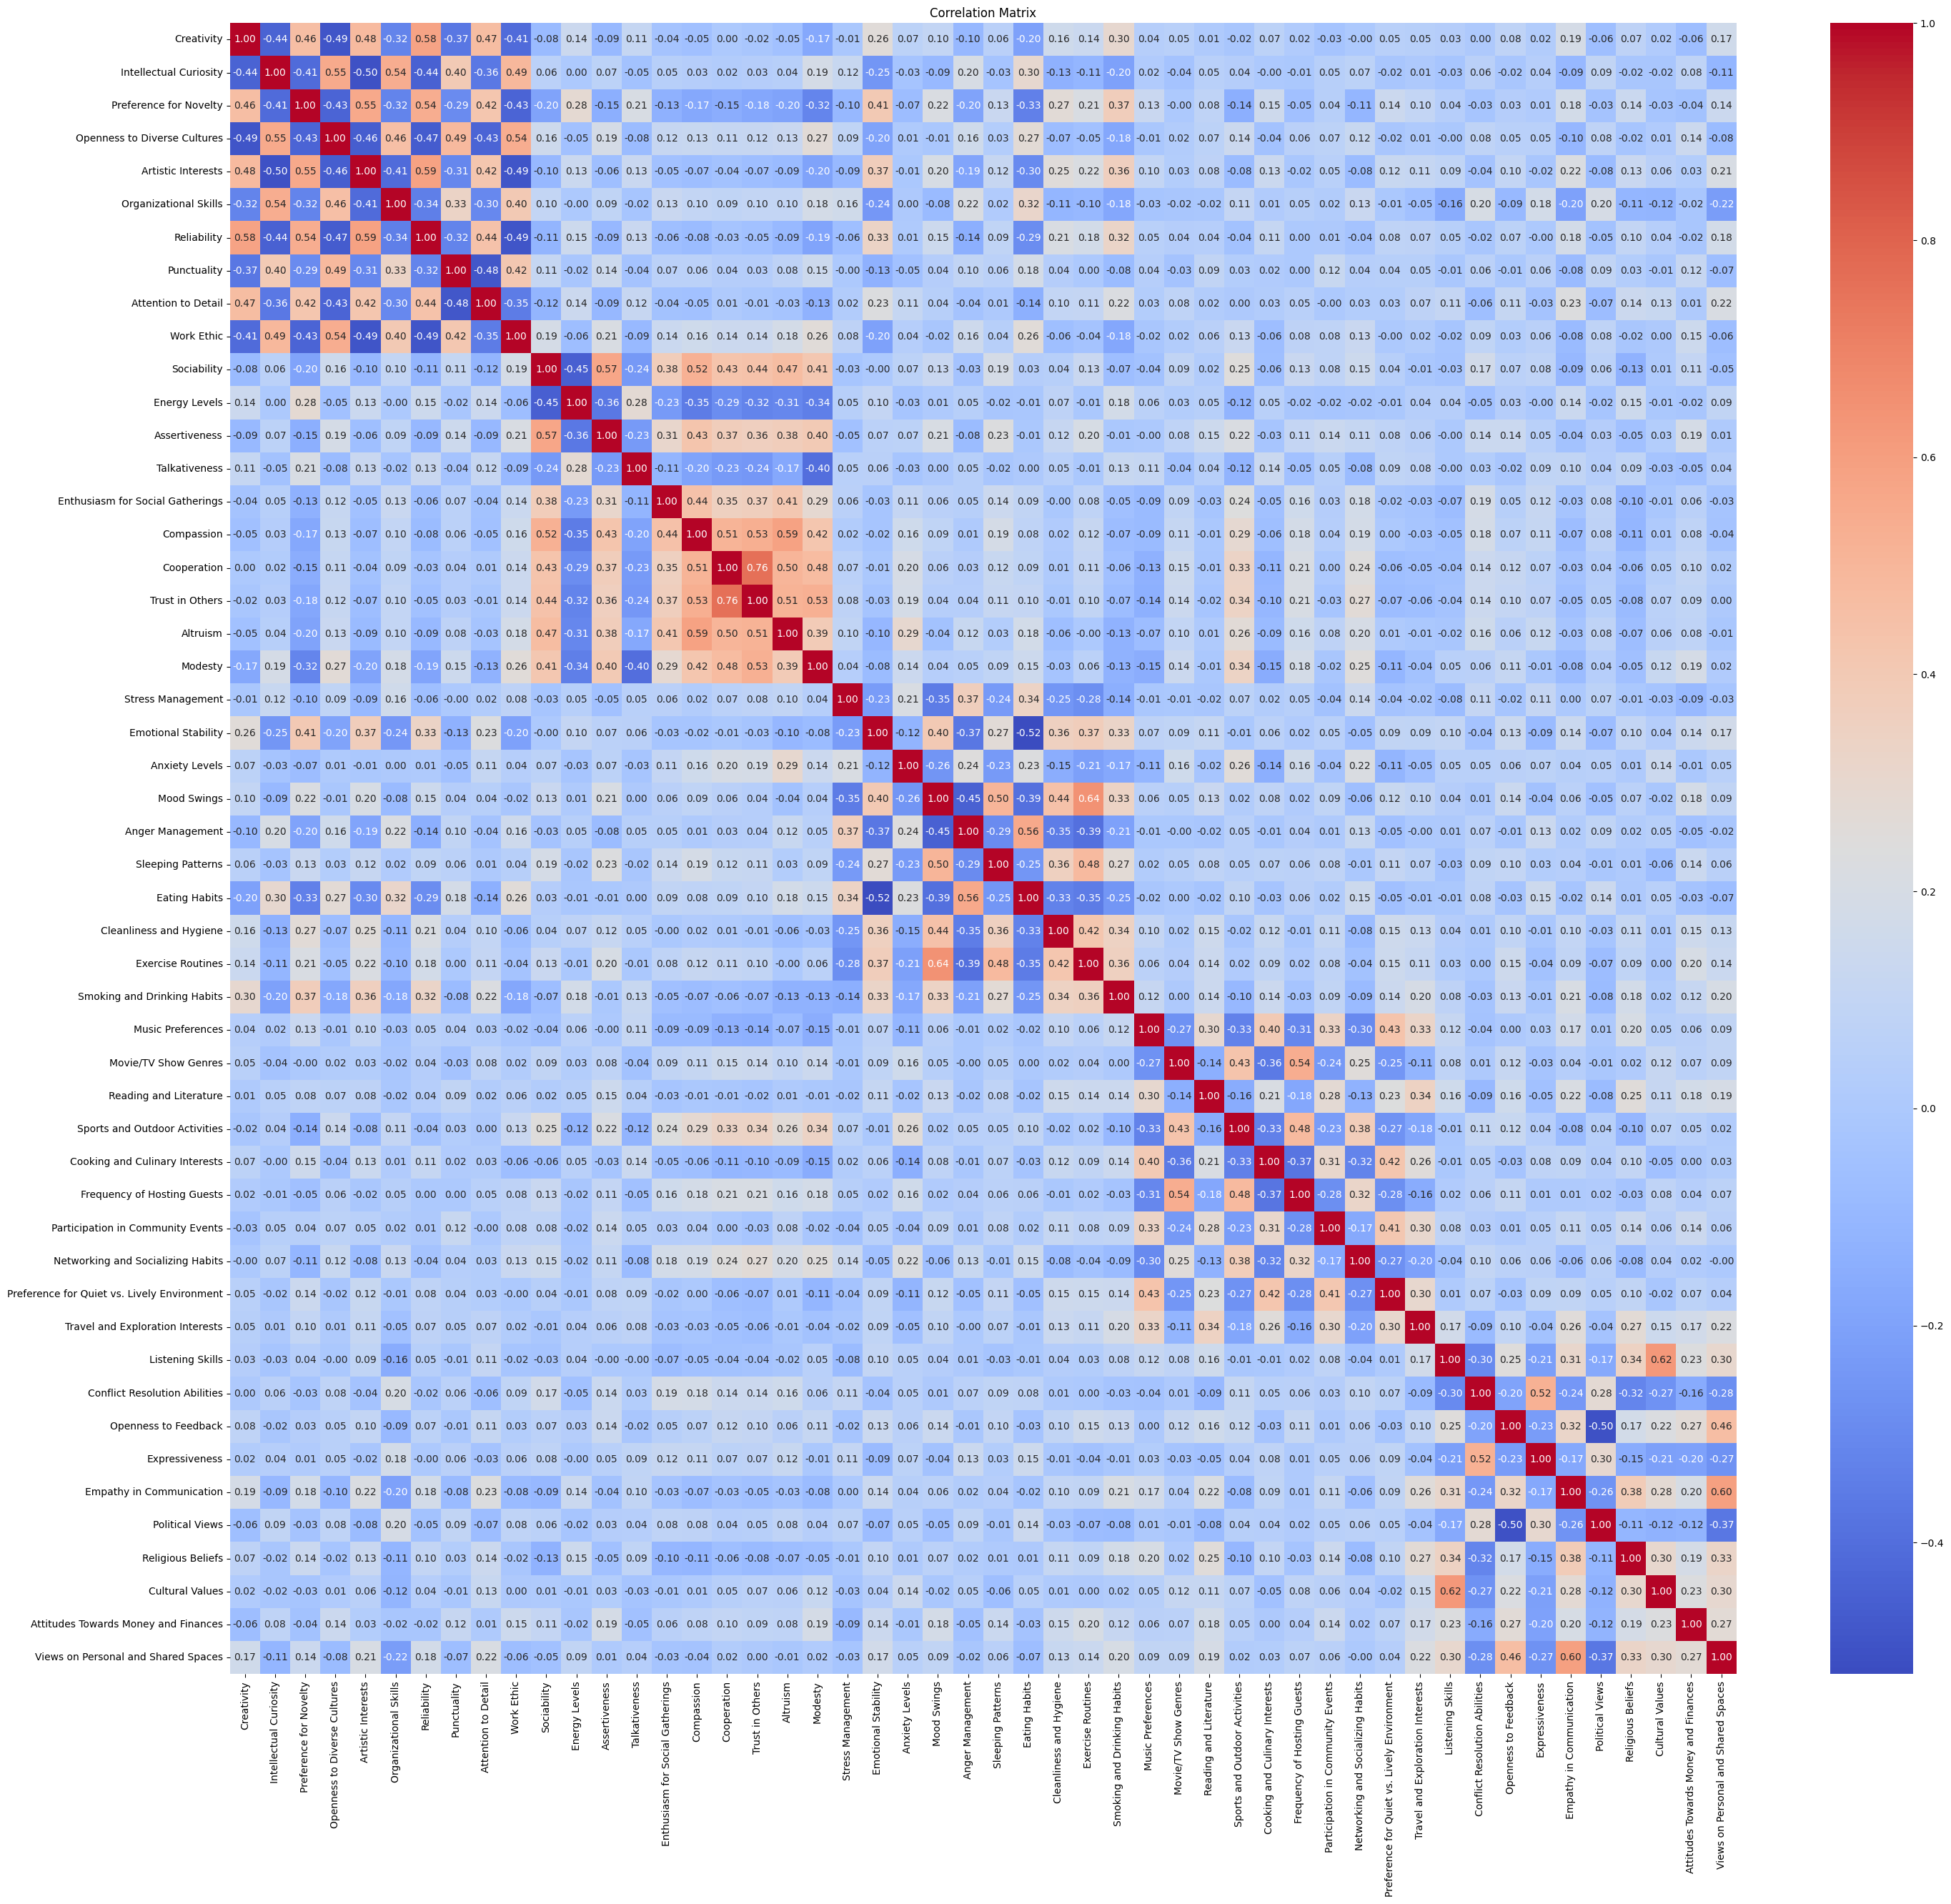

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Data_Set.xlsx'
data = pd.read_excel(file_path)

# Print the first few rows to understand what the data looks like
print("First few rows of the dataset:")
print(data.head())

# Basic Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Skewness and Kurtosis
print("\nSkewness of each feature:")
print(data.skew())
print("\nKurtosis of each feature:")
print(data.kurtosis())

# Visualizing the distribution of each numerical feature
for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Correlation Matrix and Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(34, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to explore the relationships between features
# Selecting a subset of features for clarity, or modify to use `data.columns` for all
sampled_columns = data.columns[:5]  # Adjust based on actual data features
sns.pairplot(data[sampled_columns])
plt.title('Pairwise relationships between features')
plt.show()

# Advanced Statistical Tests (Example using Pearson correlation test)
from scipy.stats import pearsonr
# Example: Correlation test between two variables
if "variable1" in data.columns and "variable2" in data.columns:
    corr_test = pearsonr(data['variable1'], data['variable2'])
    print(f"\nPearson correlation test between 'variable1' and 'variable2':")
    print(f"Correlation coefficient: {corr_test[0]}, P-value: {corr_test[1]}")


#Data Pre

Dataset shape: (100000, 50)
Columns in the dataset: ['Creativity', 'Intellectual Curiosity', 'Preference for Novelty', 'Openness to Diverse Cultures', 'Artistic Interests', 'Organizational Skills', 'Reliability', 'Punctuality', 'Attention to Detail', 'Work Ethic', 'Sociability', 'Energy Levels', 'Assertiveness', 'Talkativeness', 'Enthusiasm for Social Gatherings', 'Compassion', 'Cooperation', 'Trust in Others', 'Altruism', 'Modesty', 'Stress Management', 'Emotional Stability', 'Anxiety Levels', 'Mood Swings', 'Anger Management', 'Sleeping Patterns', 'Eating Habits', 'Cleanliness and Hygiene', 'Exercise Routines', 'Smoking and Drinking Habits', 'Music Preferences', 'Movie/TV Show Genres', 'Reading and Literature', 'Sports and Outdoor Activities', 'Cooking and Culinary Interests', 'Frequency of Hosting Guests', 'Participation in Community Events', 'Networking and Socializing Habits', 'Preference for Quiet vs. Lively Environment', 'Travel and Exploration Interests', 'Listening Skills', 'C

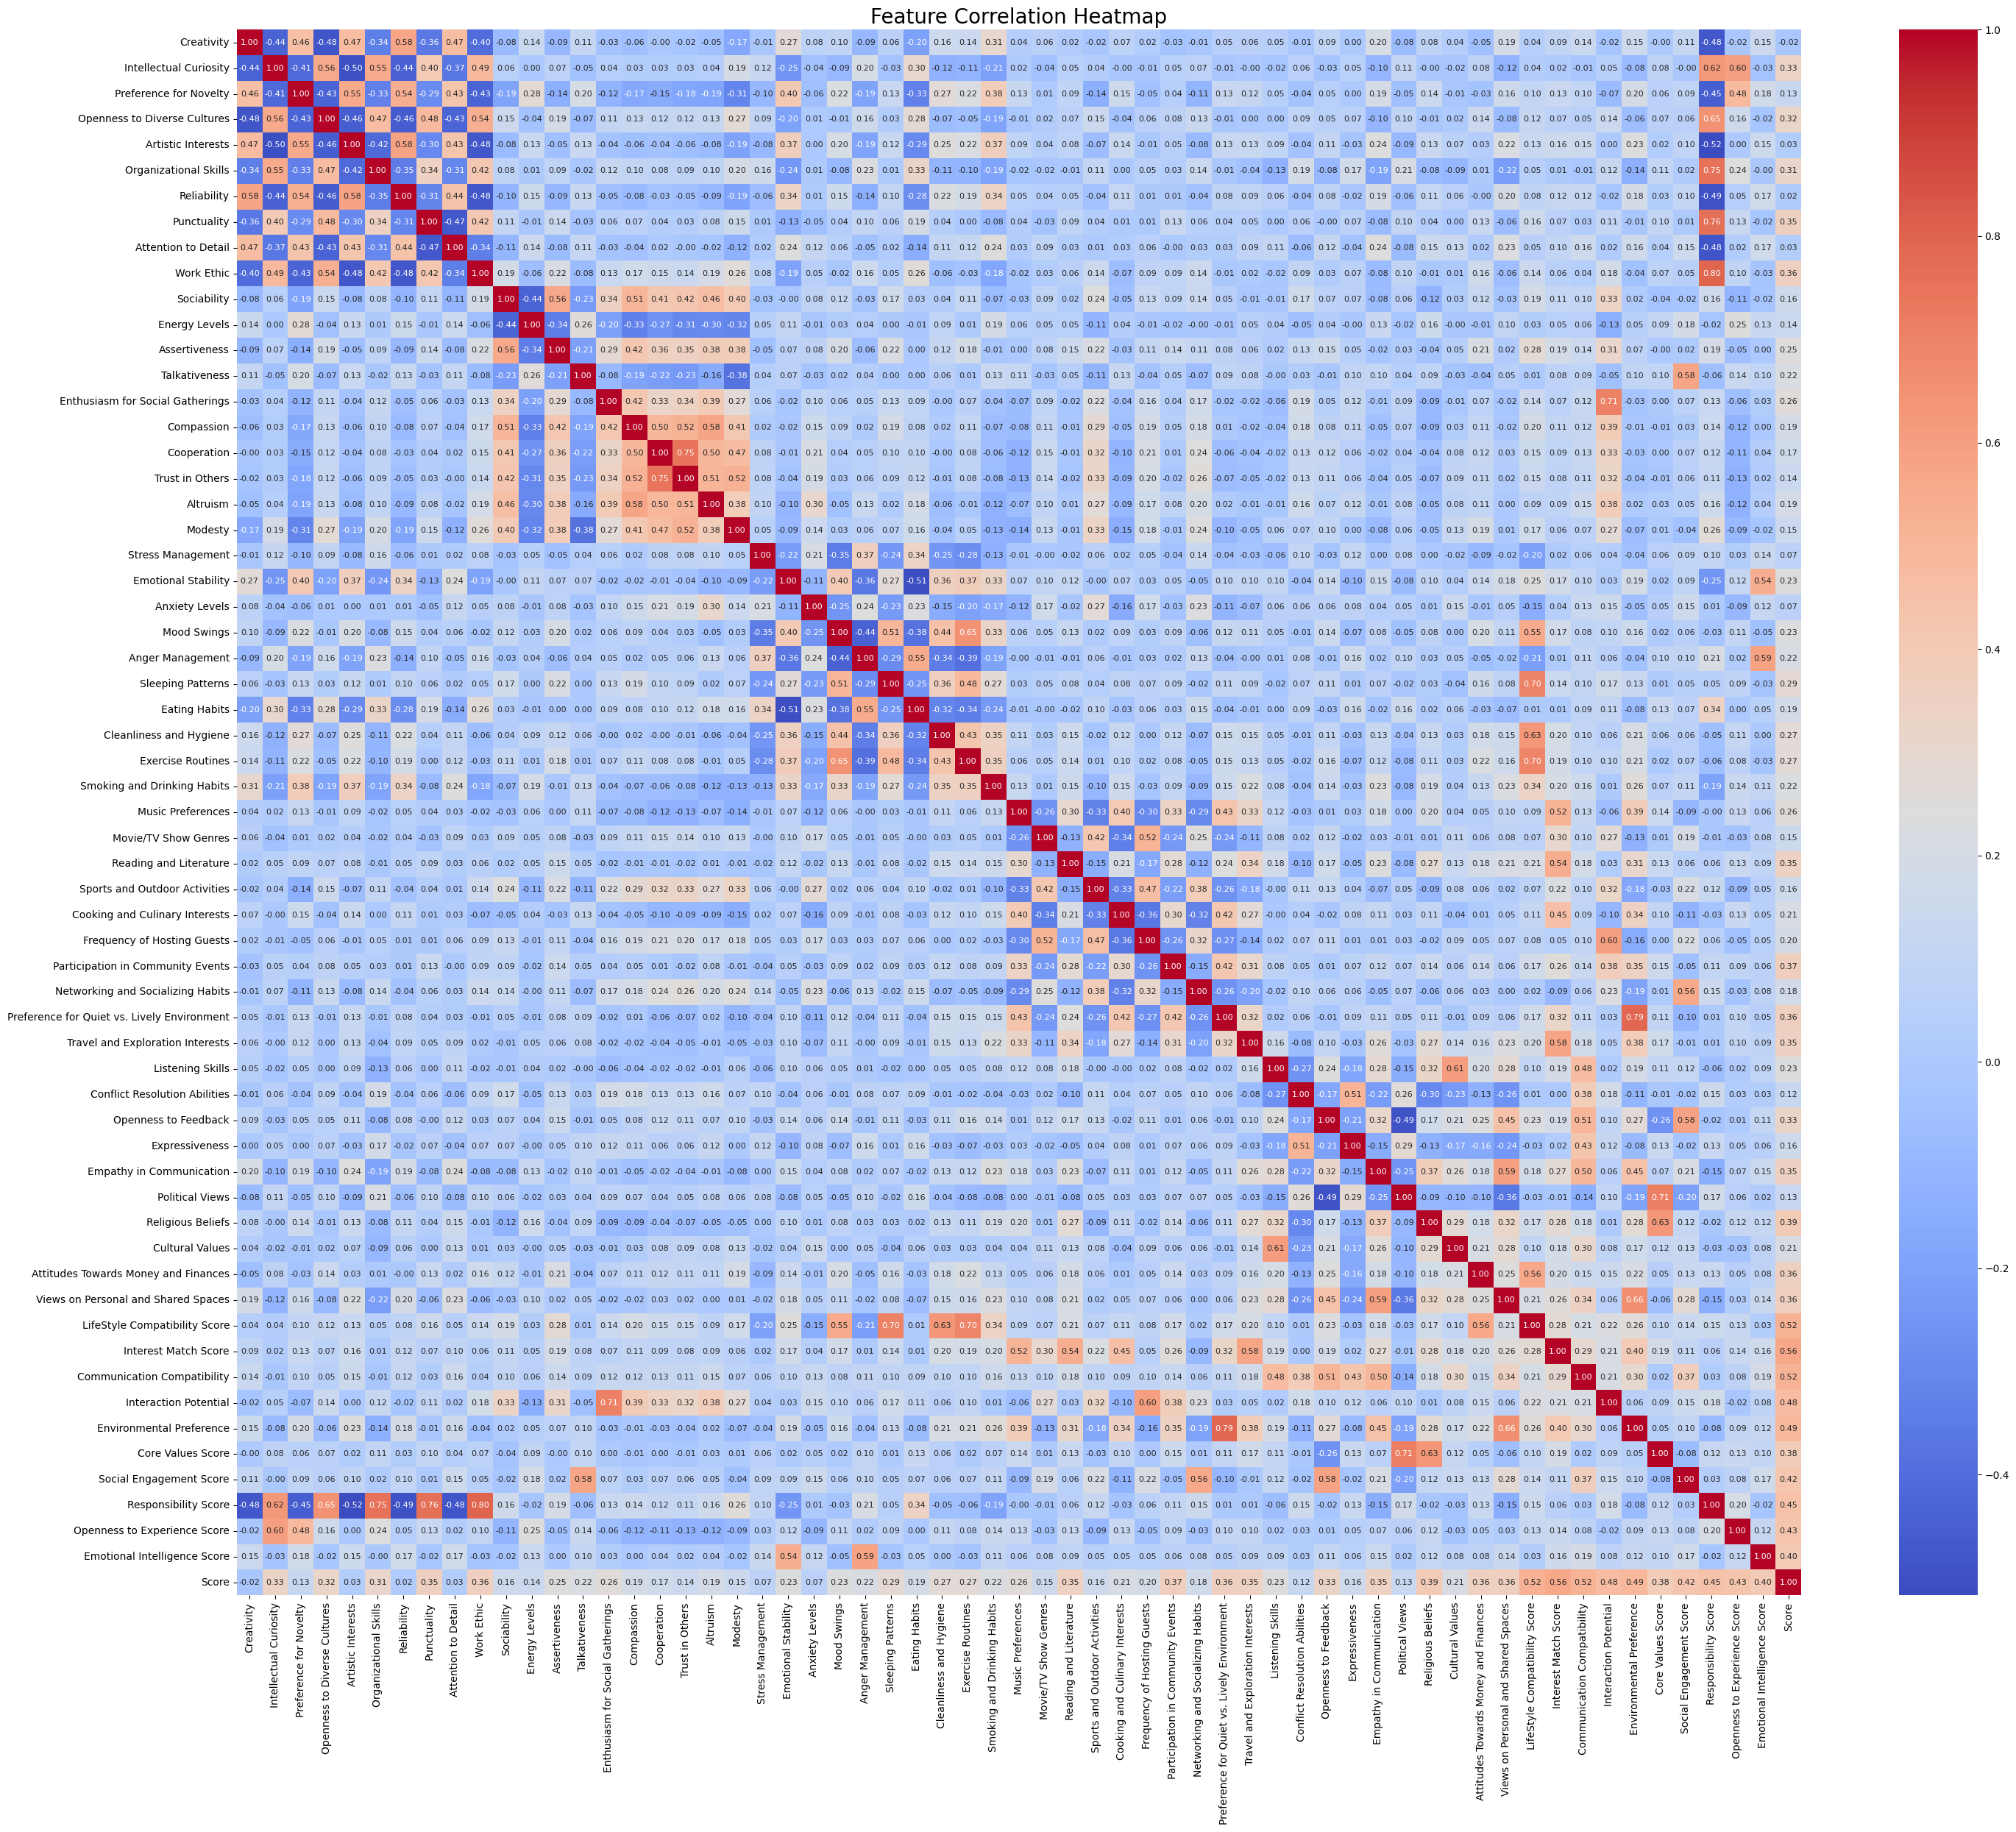


Original features dropped. Dataset now contains only the composite scores and any other features not included in the composite scores.

Dataset with all features and analyses has been saved to: /content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Master_dataset_copy.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the initial dataset
dataset_path = '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Data_Set - Copy.xlsx'
data = pd.read_excel(dataset_path)
print("Dataset shape:", data.shape)
print("Columns in the dataset:", data.columns.tolist())
print("\nFirst few rows of the dataset:")
print(data.head())

# Display basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(data.describe())

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Using mean strategy for numerical data
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns  # Adjust if your data includes other types
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


# Feature Engineering: Creating composite scores
lifestyle_features = ['Sleeping Patterns', 'Eating Habits', 'Exercise Routines', 'Cleanliness and Hygiene', 'Attitudes Towards Money and Finances']
interest_features = ['Music Preferences', 'Movie/TV Show Genres', 'Reading and Literature', 'Sports and Outdoor Activities', 'Cooking and Culinary Interests', 'Travel and Exploration Interests']
communication_features = ['Listening Skills', 'Conflict Resolution Abilities', 'Openness to Feedback', 'Expressiveness', 'Empathy in Communication']
interaction_features = ['Frequency of Hosting Guests', 'Participation in Community Events', 'Enthusiasm for Social Gatherings']
environmental_features = ['Preference for Quiet vs. Lively Environment', 'Views on Personal and Shared Spaces']
values_beliefs_features = ['Religious Beliefs', 'Political Views']
interpersonal_features = ['Openness to Feedback', 'Talkativeness', 'Networking and Socializing Habits']
work_responsibility_features = ['Work Ethic', 'Punctuality', 'Organizational Skills']
personal_development_features = ['Intellectual Curiosity', 'Preference for Novelty']
emotional_regulation_features = ['Anger Management', 'Emotional Stability']

feature_groups = [lifestyle_features, interest_features, communication_features, interaction_features, environmental_features, values_beliefs_features, interpersonal_features, work_responsibility_features, personal_development_features, emotional_regulation_features]
composite_feature_names = ['LifeStyle Compatibility Score', 'Interest Match Score', 'Communication Compatibility', 'Interaction Potential', 'Environmental Preference', 'Core Values Score', 'Social Engagement Score', 'Responsibility Score', 'Openness to Experience Score', 'Emotional Intelligence Score']

for features, name in zip(feature_groups, composite_feature_names):
    if all(column in data.columns for column in features):
        data[name] = data[features].mean(axis=1)
print("\nNew features added and computed successfully.")

# Calculate the total score sum of all composite scores
data['Score'] = data[composite_feature_names].mean(axis=1)


# Dropping original features
data = data.drop(columns=[feature for group in feature_groups for feature in group])
print("\nOriginal features dropped. Dataset now contains only the composite scores and any other features not included in the composite scores.")

# Save the processed DataFrame
output_file_path = '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Master_dataset_copy.xlsx'
data.to_excel(output_file_path, index=False)
print(f"\nDataset with all features and analyses has been saved to: {output_file_path}")


#Multi Classfication

In [ ]:
import pandas as pd

# Load the initial dataset
file_path = pd.read_excel(output_file_path)  # Assuming output_file_path is defined earlier

# Define weights for Personal Traits and Habits
weights_traits = {
    'Creativity': 1, 'Openness to Diverse Cultures': 1, 'Artistic Interests': 1,
    'Reliability': 3, 'Attention to Detail': 1, 'Sociability': 2,
    'Energy Levels': 1, 'Assertiveness': 2, 'Compassion': 2,
    'Cooperation': 3, 'Trust in Others': 2, 'Altruism': 1,
    'Modesty': 1, 'Stress Management': 3, 'Anxiety Levels': 1,
    'Mood Swings': 1
}

# Calculate the weighted score for Personal Traits and Habits
data['Personal Traits and Habits Score'] = data.apply(lambda row: sum(row[trait] * weight for trait, weight in weights_traits.items() if trait in row), axis=1)

# Calculate the maximum possible weighted score for Personal Traits and Habits
max_score_traits = sum(5 * weight for weight in weights_traits.values())
data['Personal Traits and Habits Score Normalized'] = (data['Personal Traits and Habits Score'] / max_score_traits) * 100

# Categorization function for Personal Traits and Habits
def categorize(score):
    if score <= 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

data['Personal Traits and Habits Category'] = data['Personal Traits and Habits Score Normalized'].apply(categorize)

# Define weights for Lifestyle and Cultural Preferences
weights_lifestyle = {
    'Smoking and Drinking Habits': 2,
    'Cultural Values': 1
}

# Calculate the weighted score for Lifestyle and Cultural Preferences
data['Lifestyle and Cultural Preferences Score'] = data.apply(lambda row: sum(row[feature] * weight for feature, weight in weights_lifestyle.items() if feature in row), axis=1)

# Calculate the maximum possible weighted score for Lifestyle and Cultural Preferences
max_score_lifestyle = sum(5 * weight for weight in weights_lifestyle.values())
data['Lifestyle and Cultural Preferences Score Normalized'] = (data['Lifestyle and Cultural Preferences Score'] / max_score_lifestyle) * 100

# Categorization function for Lifestyle and Cultural Preferences
def categorize_preferences(score):
    if score <= 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

data['Lifestyle and Cultural Preferences Category'] = data['Lifestyle and Cultural Preferences Score Normalized'].apply(categorize_preferences)

# Drop non-categorical score columns
data.drop(['Personal Traits and Habits Score', 'Personal Traits and Habits Score Normalized',
           'Lifestyle and Cultural Preferences Score', 'Lifestyle and Cultural Preferences Score Normalized'], axis=1, inplace=True)

# Save the updated DataFrame to an Excel file
output_file_MC = '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final_one.xlsx'
data.to_excel(output_file_MC, index=False)

# Output the final file path and display the first few rows of the dataframe
print(f"Dataset has been saved to: {output_file_path}")
data.head()


Dataset has been saved to: /content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Master_dataset_copy.xlsx


Creativity  Openness to Diverse Cultures  Artistic Interests  Reliability  \
0         4.0                           2.0                 5.0          5.0   
1         3.0                           4.0                 3.0          2.0   
2         2.0                           4.0                 3.0          1.0   
3         2.0                           3.0                 4.0          2.0   
4         3.0                           3.0                 5.0          3.0   

   Attention to Detail  Sociability  Energy Levels  Assertiveness  Compassion  \
0                  4.0          1.0            4.0            4.0         2.0   
1                  1.0          2.0            3.0            4.0         1.0   
2                  2.0          4.0            4.0            4.0         2.0   
3                  1.0          3.0            3.0            3.0         2.0   
4                  3.0          1.0            5.0            5.0         1.0   

   Cooperation  ...  Interaction Potential  Environmental Preference  \
0          2.0  ...               3.333333                       4.5   
1          2.0  ...               2.333333                       4.0   
2          2.0  ...               3.000000                       4.0   
3          2.0  ...               2.333333                       2.0   
4          1.0  ...               2.333333                       5.0   

   Core Values Score  Social Engagement Score  Responsibility Score  \
0                3.0                 2.666667              1.333333   
1                2.5                 2.666667              4.333333   
2                3.5                 2.000000              3.333333   
3                2.5                 3.333333              3.333333   
4                3.0                 3.000000              4.000000   

   Openness to Experience Score  Emotional Intelligence Score     Score  \
0                           3.0                           3.5  3.053333   
1                           4.0                           2.5  3.230000   
2                           3.5                           3.0  3.083333   
3                           2.0                           3.0  2.806667   
4                           3.0                           3.0  3.386667   

   Personal Traits and Habits Category  \
0                               Medium   
1                               Medium   
2                               Medium   
3                               Medium   
4                               Medium   

   Lifestyle and Cultural Preferences Category  
0                                         High  
1                                       Medium  
2                                       Medium  
3                                         High  
4                                       Medium  

[5 rows x 31 columns]

Load data for Model

In [ ]:
pip install openpyxl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
file_path = '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final_one.xlsx'
data = pd.read_excel(file_path)
print(data.head())

   Creativity  Openness to Diverse Cultures  Artistic Interests  Reliability  \
0         4.0                           2.0                 5.0          5.0   
1         3.0                           4.0                 3.0          2.0   
2         2.0                           4.0                 3.0          1.0   
3         2.0                           3.0                 4.0          2.0   
4         3.0                           3.0                 5.0          3.0   

   Attention to Detail  Sociability  Energy Levels  Assertiveness  Compassion  \
0                  4.0          1.0            4.0            4.0         2.0   
1                  1.0          2.0            3.0            4.0         1.0   
2                  2.0          4.0            4.0            4.0         2.0   
3                  1.0          3.0            3.0            3.0         2.0   
4                  3.0          1.0            5.0            5.0         1.0   

   Cooperation  ...  Interaction

XG Boost

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}
Best AUC score found:  0.9978677633439025
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
ROC AUC: 1.00


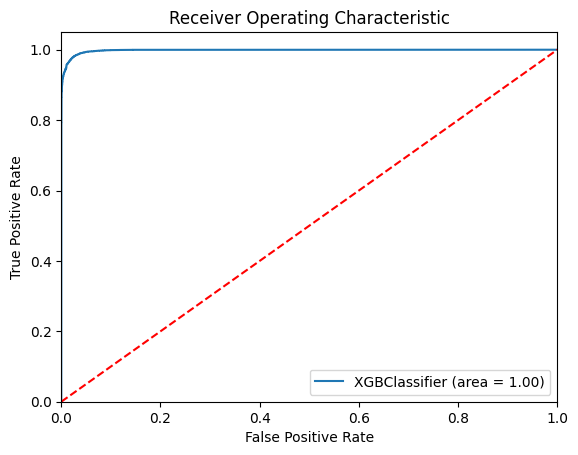

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


# Define the threshold for binary classification (e.g., median)
threshold = data['Score'].median()
data['Class'] = (data['Score'] > threshold).astype(int)

# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['Personal Traits and Habits Category', 'Lifestyle and Cultural Preferences Category']
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_features = encoder.get_feature_names_out(categorical_columns)  # Corrected to use get_feature_names_out
encoded_df = pd.DataFrame(encoded_data, columns=encoded_features)

# Drop original categorical columns and concatenate the one-hot encoded columns
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Prepare features and labels
X = data.drop(['Score', 'Class'], axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score found: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # probabilities for ROC AUC

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='XGBClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


SVM

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


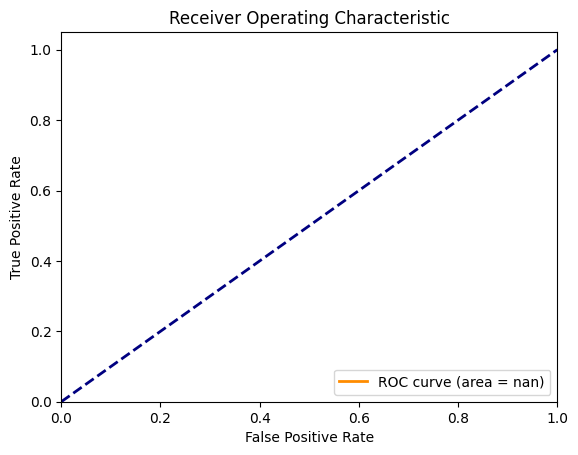

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load your dataset
file_path = '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final_Combined_Data.xlsx'
data = pd.read_excel(file_path)

# Identify categorical columns (excluding non-feature columns)
categorical_cols = data.select_dtypes(include=['object']).columns.drop(['Personal Traits and Habits Category', 'Lifestyle and Cultural Preferences Category']).tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_features = data.select_dtypes(include=[np.number]).columns.drop('Score').tolist()
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the full pipeline (preprocessing + SVR)
svr_model = SVR(C=1.0, epsilon=0.2)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', svr_model)
])

# Split the data into features and target variable
X = data.drop(columns=['Score', 'Personal Traits and Habits Category', 'Lifestyle and Cultural Preferences Category'])
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Define the threshold for categorizing as 'Compatible'
threshold = 0.5

# Calculate metrics
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Neural networks

In [ ]:
pip install tensorflow


   Creativity  Openness to Diverse Cultures  Artistic Interests  Reliability  \
0         4.0                           2.0                 5.0          5.0   
1         3.0                           4.0                 3.0          2.0   
2         2.0                           4.0                 3.0          1.0   
3         2.0                           3.0                 4.0          2.0   
4         3.0                           3.0                 5.0          3.0   

   Attention to Detail  Sociability  Energy Levels  Assertiveness  Compassion  \
0                  4.0          1.0            4.0            4.0         2.0   
1                  1.0          2.0            3.0            4.0         1.0   
2                  2.0          4.0            4.0            4.0         2.0   
3                  1.0          3.0            3.0            3.0         2.0   
4                  3.0          1.0            5.0            5.0         1.0   

   Cooperation  ...  Interest Ma

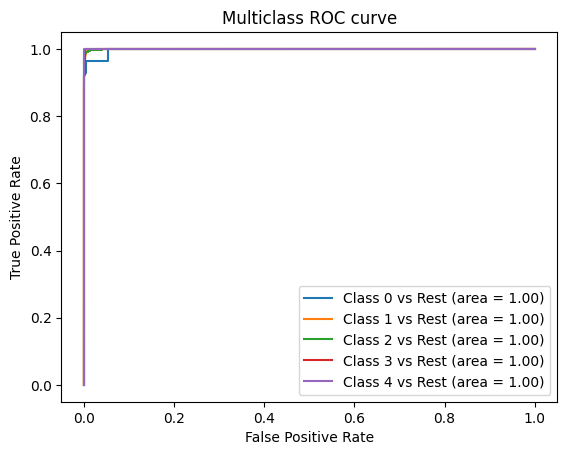

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load the dataset
print(data.head())

# Identify categorical columns and apply one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data.select_dtypes(include=[np.number]).drop(columns=['Score']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Assuming 'Score' is your target and it ranges from 1 to 5
X = data.drop(columns=['Score'])
y = data['Score'].astype(int) - 1  # Adjust target to start from 0 for to_categorical

# Convert target variable into one-hot encoding
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Adjust number of output nodes to match categories
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_prepared, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_prepared, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# ROC Curve (One-vs-All)
y_pred_proba = model.predict(X_test_prepared)
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i in range(y_test.shape[1]):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], linestyle='-', label=f'Class {i} vs Rest (area = %0.2f)' % roc_auc[i])

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


#Similirity algorithm

   Creativity  Openness to Diverse Cultures  Artistic Interests  Reliability  \
0         4.0                           2.0                 5.0          5.0   
1         3.0                           4.0                 3.0          2.0   
2         2.0                           4.0                 3.0          1.0   
3         2.0                           3.0                 4.0          2.0   
4         3.0                           3.0                 5.0          3.0   

   Attention to Detail  Sociability  Energy Levels  Assertiveness  Compassion  \
0                  4.0          1.0            4.0            4.0         2.0   
1                  1.0          2.0            3.0            4.0         1.0   
2                  2.0          4.0            4.0            4.0         2.0   
3                  1.0          3.0            3.0            3.0         2.0   
4                  3.0          1.0            5.0            5.0         1.0   

   Cooperation  ...  Interest Ma

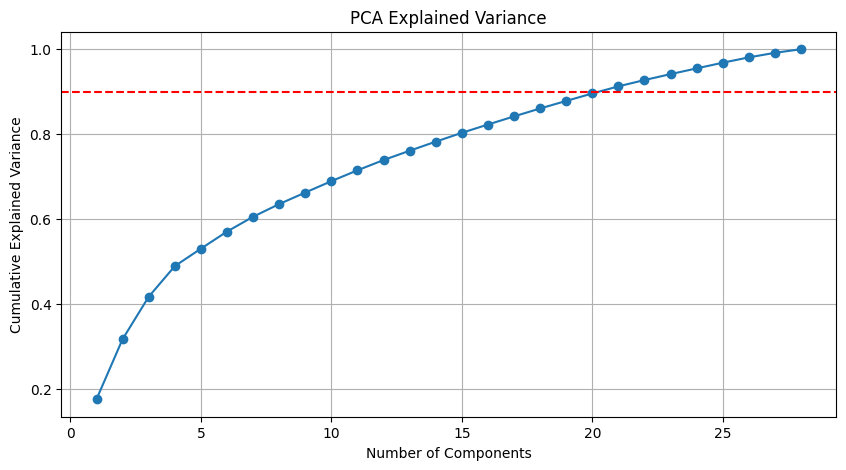

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


print(data.head())

# Identify categorical columns for one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing
processed_data = preprocessor.fit_transform(data)

# Variables to store explained variances and the range of components
explained_variances = []
components_range = range(1, min(processed_data.shape[1], 51))  # Adjust up to 50 components or the number of features

# Apply PCA for different numbers of components
for n_components in components_range:
    pca = PCA(n_components=n_components)
    pca.fit(processed_data)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

# Find the number of components for at least 90% variance if possible
n_components_90 = len(explained_variances)  # Default to max if 90% isn't reached
for x, val in enumerate(explained_variances):
    if val >= 0.90:
        n_components_90 = x + 1  # +1 because index is zero-based
        break

print(f"Number of components capturing at least 90% variance: {n_components_90}")

# Perform PCA with the optimal number of components found
pca_optimal = PCA(n_components=n_components_90)
optimal_components = pca_optimal.fit_transform(processed_data)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(optimal_components)

# Convert to DataFrame for easier manipulation
similarity_df = pd.DataFrame(cosine_sim)

# Function to find top roommate matches for an individual
def find_top_matches(similarity_matrix, individual_index, top_n=5):
    # Get the similarity scores for the individual and sort them in descending order
    scores = similarity_matrix[individual_index]
    top_matches_indices = np.argsort(-scores)[1:top_n+1]  # Skip the first one (self)
    return top_matches_indices

# Example: Find the top 5 matches for the first individual
top_matches_for_first_individual = find_top_matches(cosine_sim, 0, top_n=5)
print(f"Top 5 roommate matches for individual 0: {top_matches_for_first_individual}")

# Plot the explained variance to see how it changes with the number of components
plt.figure(figsize=(10, 5))
plt.plot(components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line for reference
plt.show()


U-Map

In [ ]:
pip install umap-learn


   Creativity  Openness to Diverse Cultures  Artistic Interests  Reliability  \
0         4.0                           2.0                 5.0          5.0   
1         3.0                           4.0                 3.0          2.0   
2         2.0                           4.0                 3.0          1.0   
3         2.0                           3.0                 4.0          2.0   
4         3.0                           3.0                 5.0          3.0   

   Attention to Detail  Sociability  Energy Levels  Assertiveness  Compassion  \
0                  4.0          1.0            4.0            4.0         2.0   
1                  1.0          2.0            3.0            4.0         1.0   
2                  2.0          4.0            4.0            4.0         2.0   
3                  1.0          3.0            3.0            3.0         2.0   
4                  3.0          1.0            5.0            5.0         1.0   

   Cooperation  ...  Interest Ma

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

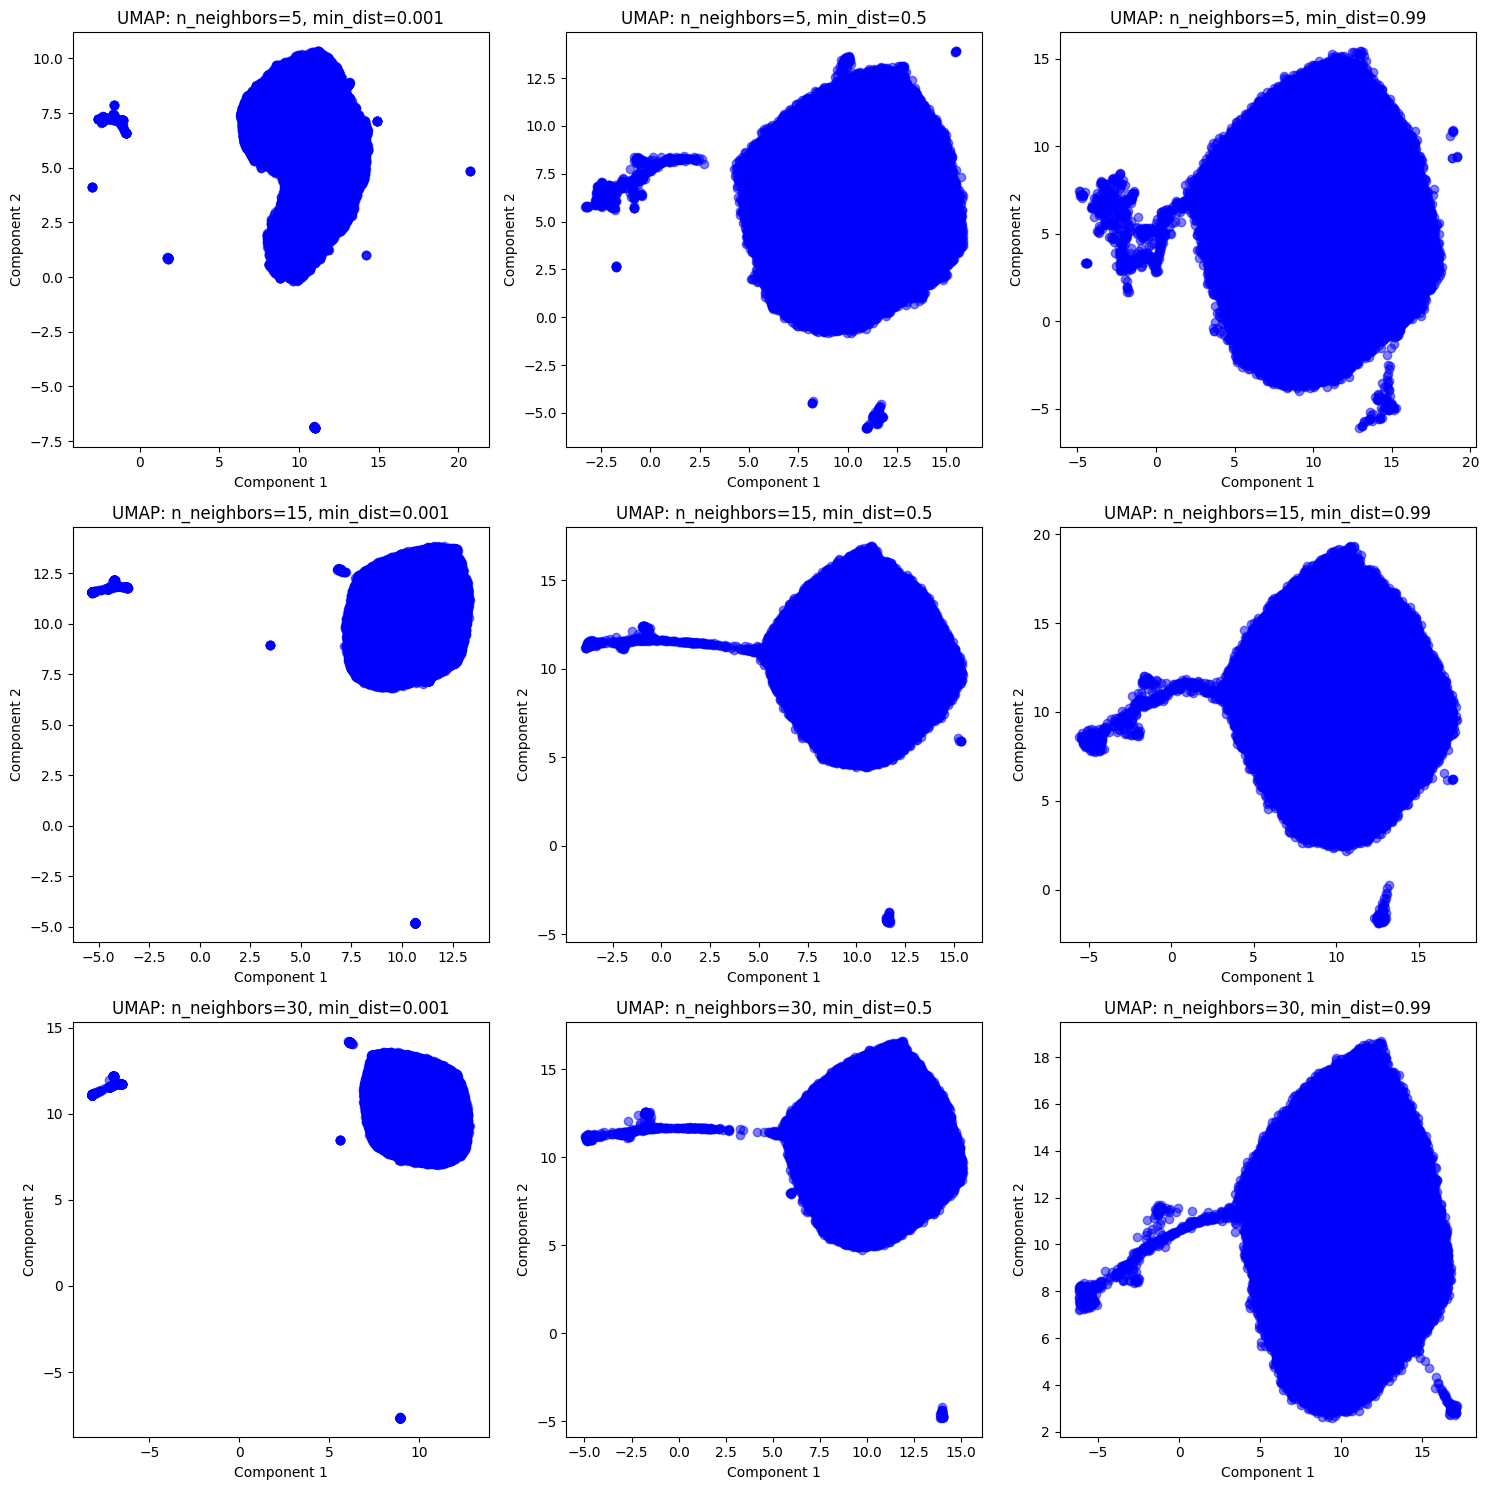

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


      0         1         2         3         4         5         6      \
0  1.000000  0.995101  0.999090  0.999851  0.997636  0.992582  0.996398   
1  0.995101  1.000000  0.998412  0.993243  0.999542  0.999739  0.983132   
2  0.999090  0.998412  1.000000  0.998203  0.999659  0.996864  0.991873   
3  0.999851  0.993243  0.998203  1.000000  0.996299  0.990332  0.997715   
4  0.997636  0.999542  0.999659  0.996299  1.000000  0.998590  0.988215   

      7         8         9      ...     99990     99991     99992     99993  \
0  0.992180  0.999555  0.998460  ...  0.979987  0.988701  0.981805  0.995265   
1  0.999659  0.991709  0.999053  ...  0.955505  0.998677  0.995769  0.980779   
2  0.996601  0.997373  0.999918  ...  0.970604  0.994195  0.989011  0.990213   
3  0.989874  0.999921  0.997352  ...  0.983281  0.985962  0.978376  0.996796   
4  0.998412  0.995142  0.999912  ...  0.963991  0.996665  0.992533  0.986233   

      99994     99995     99996     99997     99998     99999  
0  0

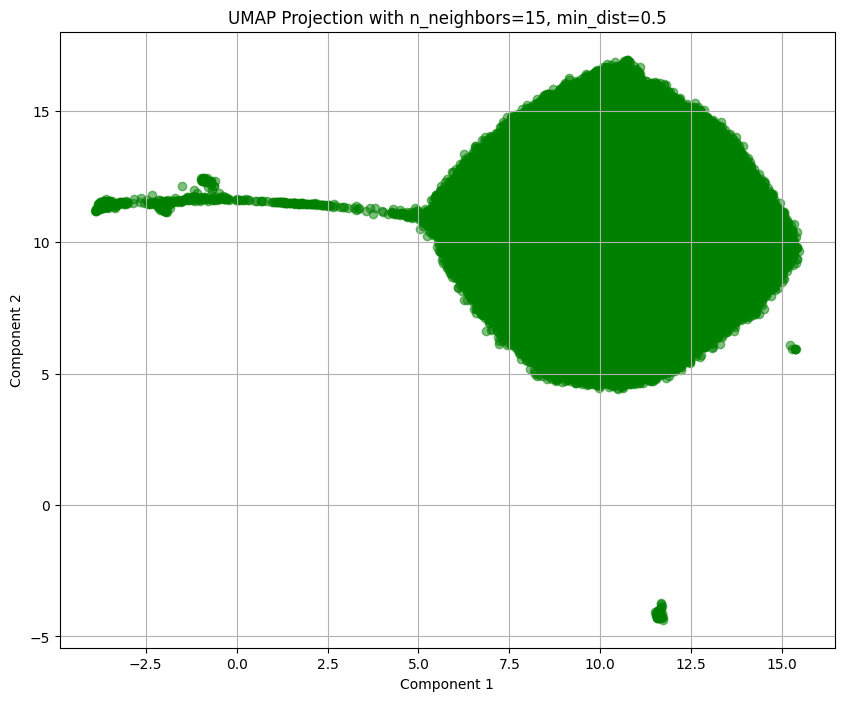

In [ ]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'data' is predefined or loaded previously
print(data.head())

# Identify categorical and numeric columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing to data
processed_data = preprocessor.fit_transform(data)

# Initialize and plot UMAP for each set of parameters
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Prepare a grid for plotting
axes = axes.flatten()
plot_index = 0

for n in [5, 15, 30]:  # Test with different numbers of neighbors
    for d in [0.001, 0.5, 0.99]:  # Test with different min_dist values
        # Note the removal of n_jobs, let UMAP manage it
        reducer = umap.UMAP(n_components=2, n_neighbors=n, min_dist=d, random_state=42)
        embedding = reducer.fit_transform(processed_data)
        sim_matrix = cosine_similarity(embedding)

        # Plot each embedding
        ax = axes[plot_index]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c='blue', alpha=0.5)
        ax.set_title(f'UMAP: n_neighbors={n}, min_dist={d}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        plot_index += 1

plt.tight_layout()
plt.show()

# For a detailed example with one setting
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.5, random_state=42)
embedding = reducer.fit_transform(processed_data)

# Calculate cosine similarity matrix from the UMAP reduced data
similarity_matrix = cosine_similarity(embedding)

# Convert the similarity matrix to a DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix)

# Print the first few rows of the similarity matrix
print(similarity_df.head())

# Visualize the final chosen embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c='green', alpha=0.5)
plt.title('UMAP Projection with n_neighbors=15, min_dist=0.5')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


#Cosine Similirity with K Maps (Final)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from joblib import dump, load  # Importing dump and load functions from joblib

# Separate numerical and categorical columns
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

# Normalize the numerical data
normalized_numerical_data = numerical_data / numerical_data.max()

# One-hot encode categorical data
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(categorical_data)
encoded_categorical_data = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out())

# Save the encoder for later use
dump(encoder, '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /encoder1M.joblib')  # Exporting the encoder

# Reconstruct the dataset combining both numerical and encoded categorical data
data_processed = pd.concat([numerical_data.reset_index(drop=True), encoded_categorical_data], axis=1)

# Compute cosine similarity matrix on normalized numerical data
similarity_matrix = cosine_similarity(normalized_numerical_data)

# Optionally save the similarity matrix for later use
np.save('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /similarity_matrix1M.npy', similarity_matrix)  # Saving the similarity matrix as a .npy file

# Extracting k-nearest neighbors features
k = 5
sorted_indices = np.argsort(-similarity_matrix, axis=1)
top_k_indices = sorted_indices[:, 1:k+1]  # skip the first one (self)

# Add new features from the cosine similarity matrix
data_processed['max_similarity'] = np.max(similarity_matrix, axis=1)
data_processed['mean_top_k_similarity'] = np.mean(similarity_matrix[np.arange(len(similarity_matrix))[:, None], top_k_indices], axis=1)

# Threshold analysis for defining compatibility
compatibility_threshold = 0.99  # Define a high threshold for compatibility
data_processed['is_compatible'] = data_processed['max_similarity'] >= compatibility_threshold

# Save the data processing pipeline settings
data_processing_settings = {
    'numerical_max': numerical_data.max(),
    'categorical_features': categorical_data.columns.tolist(),
    'encoder': '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /encoder1M.joblib',
    'similarity_matrix': '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /similarity_matrix1M.npy'
}
dump(data_processing_settings, '/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /data_processing_settings1M.joblib')

# Display the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Display the indices of the k-nearest neighbors
print("\nk-Nearest Neighbors Indices:")
print(top_k_indices)

# Optionally, display the actual similarity scores for the k-nearest neighbors
print("\nk-Nearest Neighbors Similarity Scores:")
for index, values in enumerate(top_k_indices):
    print(f"Data Point {index}: {similarity_matrix[index, values]}")

# Display compatibility results based on the threshold
print("\nCompatibility Results Based on Threshold:")
print(data_processed['is_compatible'].value_counts())

# Optionally, you can save the processed data if needed
data_processed.to_csv('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /data_processed1M.csv', index=False)


Streaming output truncated to the last 5000 lines.
Data Point 95006: [0.99187421 0.99041993 0.9903809  0.99022441 0.99016336]
Data Point 95007: [0.98934304 0.98923675 0.98759669 0.98693362 0.98627891]
Data Point 95008: [0.97986329 0.97929226 0.97700835 0.97510671 0.97170303]
Data Point 95009: [0.98853944 0.98694521 0.98654461 0.98653992 0.98564666]
Data Point 95010: [0.99288551 0.9921496  0.99170904 0.99107518 0.99074969]
Data Point 95011: [0.98682102 0.98570778 0.98525202 0.98460814 0.98439327]
Data Point 95012: [0.98769695 0.98629144 0.98599014 0.98573503 0.98549089]
Data Point 95013: [0.97109292 0.97090362 0.97041246 0.96892905 0.9688583 ]
Data Point 95014: [0.9909567  0.99068482 0.99028445 0.9898671  0.98894801]
Data Point 95015: [0.98793668 0.98458222 0.98422543 0.98352451 0.98274751]
Data Point 95016: [0.97771892 0.97267865 0.9714403  0.97010177 0.96985654]
Data Point 95017: [0.98993546 0.98865246 0.98848077 0.98685309 0.98597732]
Data Point 95018: [0.9904348  0.98808207 0.987242

Deployment

Data Preparation

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the initial dataset
dataset_path = '/content/Survey Dataset.xlsx'
data = pd.read_excel(dataset_path)
print("Dataset shape:", data.shape)
print("Columns in the dataset:", data.columns.tolist())
print("\nFirst few rows of the dataset:")
print(data.head())

# Display basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(data.describe())

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Using mean strategy for numerical data
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns  # Adjust if your data includes other types
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Feature Engineering: Creating composite scores
lifestyle_features = ['Sleeping Patterns', 'Eating Habits', 'Exercise Routines', 'Cleanliness and Hygiene', 'Attitudes Towards Money and Finances']
interest_features = ['Music Preferences', 'Movie/TV Show Genres', 'Reading and Literature', 'Sports and Outdoor Activities', 'Cooking and Culinary Interests', 'Travel and Exploration Interests']
communication_features = ['Listening Skills', 'Conflict Resolution Abilities', 'Openness to Feedback', 'Expressiveness', 'Empathy in Communication']
interaction_features = ['Frequency of Hosting Guests', 'Participation in Community Events', 'Enthusiasm for Social Gatherings']
environmental_features = ['Preference for Quiet vs. Lively Environment', 'Views on Personal and Shared Spaces']
values_beliefs_features = ['Religious Beliefs', 'Political Views']
interpersonal_features = ['Openness to Feedback', 'Talkativeness', 'Networking and Socializing Habits']
work_responsibility_features = ['Work Ethic', 'Punctuality', 'Organizational Skills']
personal_development_features = ['Intellectual Curiosity', 'Preference for Novelty']
emotional_regulation_features = ['Anger Management', 'Emotional Stability']

feature_groups = [lifestyle_features, interest_features, communication_features, interaction_features, environmental_features, values_beliefs_features, interpersonal_features, work_responsibility_features, personal_development_features, emotional_regulation_features]
composite_feature_names = ['LifeStyle Compatibility Score', 'Interest Match Score', 'Communication Compatibility', 'Interaction Potential', 'Environmental Preference', 'Core Values Score', 'Social Engagement Score', 'Responsibility Score', 'Openness to Experience Score', 'Emotional Intelligence Score']

for features, name in zip(feature_groups, composite_feature_names):
    if all(column in data.columns for column in features):
        data[name] = data[features].mean(axis=1)
print("\nNew features added and computed successfully.")

# Calculate the total score sum of all composite scores
data['Score'] = data[composite_feature_names].mean(axis=1)

# Dropping original features
data = data.drop(columns=[feature for group in feature_groups for feature in group])
print("\nOriginal features dropped. Dataset now contains only the composite scores and any other features not included in the composite scores.")

# Save the processed DataFrame
output_file_path = '/content/Master_dataset_copy.xlsx'
data.to_excel(output_file_path, index=False)
print(f"\nDataset with all features and analyses has been saved to: {output_file_path}")

# Additional Scoring and Categorization

# Load the processed dataset
file_path = pd.read_excel(output_file_path)  # Assuming output_file_path is defined earlier

# Define weights for Personal Traits and Habits
weights_traits = {
    'Creativity': 1, 'Openness to Diverse Cultures': 1, 'Artistic Interests': 1,
    'Reliability': 3, 'Attention to Detail': 1, 'Sociability': 2,
    'Energy Levels': 1, 'Assertiveness': 2, 'Compassion': 2,
    'Cooperation': 3, 'Trust in Others': 2, 'Altruism': 1,
    'Modesty': 1, 'Stress Management': 3, 'Anxiety Levels': 1,
    'Mood Swings': 1
}

# Calculate the weighted score for Personal Traits and Habits
data['Personal Traits and Habits Score'] = data.apply(lambda row: sum(row[trait] * weight for trait, weight in weights_traits.items() if trait in row), axis=1)

# Calculate the maximum possible weighted score for Personal Traits and Habits
max_score_traits = sum(5 * weight for weight in weights_traits.values())
data['Personal Traits and Habits Score Normalized'] = (data['Personal Traits and Habits Score'] / max_score_traits) * 100

# Categorization function for Personal Traits and Habits
def categorize(score):
    if score <= 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

data['Personal Traits and Habits Category'] = data['Personal Traits and Habits Score Normalized'].apply(categorize)

# Define weights for Lifestyle and Cultural Preferences
weights_lifestyle = {
    'Smoking and Drinking Habits': 2,
    'Cultural Values': 1
}

# Calculate the weighted score for Lifestyle and Cultural Preferences
data['Lifestyle and Cultural Preferences Score'] = data.apply(lambda row: sum(row[feature] * weight for feature, weight in weights_lifestyle.items() if feature in row), axis=1)

# Calculate the maximum possible weighted score for Lifestyle and Cultural Preferences
max_score_lifestyle = sum(5 * weight for weight in weights_lifestyle.values())
data['Lifestyle and Cultural Preferences Score Normalized'] = (data['Lifestyle and Cultural Preferences Score'] / max_score_lifestyle) * 100

# Categorization function for Lifestyle and Cultural Preferences
def categorize_preferences(score):
    if score <= 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

data['Lifestyle and Cultural Preferences Category'] = data['Lifestyle and Cultural Preferences Score Normalized'].apply(categorize_preferences)

# Drop non-categorical score columns
data.drop(['Personal Traits and Habits Score', 'Personal Traits and Habits Score Normalized',
           'Lifestyle and Cultural Preferences Score', 'Lifestyle and Cultural Preferences Score Normalized'], axis=1, inplace=True)

# Save the updated DataFrame to an Excel file
output_file_MC = '/content/Final_one.xlsx'
data.to_excel(output_file_MC, index=False)

# Output the final file path and display the first few rows of the dataframe
print(f"Dataset has been saved to: {output_file_MC}")
data.head()


Dataset shape: (545, 50)
Columns in the dataset: ['Creativity', 'Intellectual Curiosity', 'Preference for Novelty', 'Openness to Diverse Cultures', 'Artistic Interests', 'Organizational Skills', 'Reliability', 'Punctuality', 'Attention to Detail', 'Work Ethic', 'Sociability', 'Energy Levels', 'Assertiveness', 'Talkativeness', 'Enthusiasm for Social Gatherings', 'Compassion', 'Cooperation', 'Trust in Others', 'Altruism', 'Modesty', 'Stress Management', 'Emotional Stability', 'Anxiety Levels', 'Mood Swings', 'Anger Management', 'Sleeping Patterns', 'Eating Habits', 'Cleanliness and Hygiene', 'Exercise Routines', 'Smoking and Drinking Habits', 'Music Preferences', 'Movie/TV Show Genres', 'Reading and Literature', 'Sports and Outdoor Activities', 'Cooking and Culinary Interests', 'Frequency of Hosting Guests', 'Participation in Community Events', 'Networking and Socializing Habits', 'Preference for Quiet vs. Lively Environment', 'Travel and Exploration Interests', 'Listening Skills', 'Conf

Creativity  Openness to Diverse Cultures  Artistic Interests  Reliability  \
0         5.0                           3.0                 3.0          4.0   
1         5.0                           1.0                 5.0          5.0   
2         1.0                           5.0                 3.0          2.0   
3         3.0                           5.0                 4.0          2.0   
4         1.0                           3.0                 2.0          1.0   

   Attention to Detail  Sociability  Energy Levels  Assertiveness  Compassion  \
0                  1.0          5.0            1.0            4.0         1.0   
1                  1.0          2.0            3.0            3.0         1.0   
2                  1.0          2.0            3.0            1.0         5.0   
3                  3.0          1.0            5.0            3.0         3.0   
4                  1.0          4.0            3.0            1.0         4.0   

   Cooperation  ...  Interaction Potential  Environmental Preference  \
0          2.0  ...               2.000000                       1.0   
1          5.0  ...               2.000000                       1.0   
2          2.0  ...               1.333333                       1.0   
3          4.0  ...               1.666667                       0.5   
4          3.0  ...               1.000000                       1.5   

   Core Values Score  Social Engagement Score  Responsibility Score  \
0                1.0                 2.666667              2.333333   
1                2.0                 4.333333              2.666667   
2                0.5                 3.333333              3.000000   
3                1.5                 2.000000              4.000000   
4                1.5                 3.333333              2.666667   

   Openness to Experience Score  Emotional Intelligence Score     Score  \
0                           4.5                           2.5  2.043333   
1                           1.5                           3.0  2.246667   
2                           3.0                           3.5  2.136667   
3                           3.0                           4.5  2.373333   
4                           3.0                           4.5  2.473333   

   Personal Traits and Habits Category  \
0                               Medium   
1                               Medium   
2                               Medium   
3                               Medium   
4                               Medium   

   Lifestyle and Cultural Preferences Category  
0                                         High  
1                                       Medium  
2                                          Low  
3                                       Medium  
4                                       Medium  

[5 rows x 31 columns]

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load

# Load the encoder and data processing settings
encoder = load('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /encoder.joblib')
data_processing_settings = load('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /data_processing_settings.joblib')

# Load the similarity matrix
similarity_matrix = np.load('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /similarity_matrix.npy')

# Load the processed training data
data_processed = pd.read_csv('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /data_processed.csv')

# Extract the normalized numerical data max values from the processed data
numerical_columns = data_processing_settings['numerical_max'].index
normalized_numerical_data = data_processed[numerical_columns]
numerical_max = normalized_numerical_data.max()

# Load the test data
test_data = pd.read_excel('/content/Final_one.xlsx')

# Separate numerical and categorical columns
test_numerical_data = test_data[numerical_columns]
test_categorical_data = test_data[data_processing_settings['categorical_features']]

# Normalize the numerical data using the max values from the training data
normalized_test_numerical_data = test_numerical_data / numerical_max

# One-hot encode categorical data using the loaded encoder
encoded_test_categorical_data = encoder.transform(test_categorical_data)
encoded_test_categorical_data = pd.DataFrame(encoded_test_categorical_data, columns=encoder.get_feature_names_out())

# Reconstruct the dataset combining both normalized numerical and encoded categorical data
test_data_processed = pd.concat([normalized_test_numerical_data.reset_index(drop=True), encoded_test_categorical_data], axis=1)

# Compute cosine similarity matrix for test data against itself
similarity_matrix_test_to_test = cosine_similarity(normalized_test_numerical_data)

# Rank the matches for each test data point based on similarity score
ranked_matches = np.argsort(-similarity_matrix_test_to_test, axis=1)

# Create a DataFrame to hold the ranking results
ranked_results = []

for index, rankings in enumerate(ranked_matches):
    ranked_results.append({
        'Test Data Point': index,
        'Best Match': rankings[1],  # First one is self, second one is the best match
        'Best Match Similarity Score': similarity_matrix_test_to_test[index, rankings[1]],
        'Second Best Match': rankings[2],
        'Second Best Match Similarity Score': similarity_matrix_test_to_test[index, rankings[2]],
        'Third Best Match': rankings[3],
        'Third Best Match Similarity Score': similarity_matrix_test_to_test[index, rankings[3]],
        'Fourth Best Match': rankings[4],
        'Fourth Best Match Similarity Score': similarity_matrix_test_to_test[index, rankings[4]]
    })

ranked_results_df = pd.DataFrame(ranked_results)

# Display the ranked results in the desired format
for index, row in ranked_results_df.iterrows():
    print(f"Best match for Test Data Point {row['Test Data Point']} is Test Data Point {row['Best Match']} with similarity score {row['Best Match Similarity Score']:.4f}")

# Find and display the best matches for a specific unique ID (e.g., 1)
unique_id = 1
unique_id_matches = ranked_results_df[ranked_results_df['Test Data Point'] == unique_id].iloc[0]

print(f"\nBest Match for Unique ID {unique_id} is:")
print(f"1. Test Data Point {unique_id_matches['Best Match']} with similarity score {unique_id_matches['Best Match Similarity Score']:.4f}")
print(f"2. Test Data Point {unique_id_matches['Second Best Match']} with similarity score {unique_id_matches['Second Best Match Similarity Score']:.4f}")
print(f"3. Test Data Point {unique_id_matches['Third Best Match']} with similarity score {unique_id_matches['Third Best Match Similarity Score']:.4f}")
print(f"4. Test Data Point {unique_id_matches['Fourth Best Match']} with similarity score {unique_id_matches['Fourth Best Match Similarity Score']:.4f}")

# Optionally, save the ranked match results
ranked_results_df.to_csv('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /ranked_match_results.csv', index=False)


Best match for Test Data Point 0.0 is Test Data Point 177.0 with similarity score 0.9412
Best match for Test Data Point 1.0 is Test Data Point 275.0 with similarity score 0.9347
Best match for Test Data Point 2.0 is Test Data Point 62.0 with similarity score 0.9206
Best match for Test Data Point 3.0 is Test Data Point 382.0 with similarity score 0.9575
Best match for Test Data Point 4.0 is Test Data Point 96.0 with similarity score 0.9449
Best match for Test Data Point 5.0 is Test Data Point 425.0 with similarity score 0.9412
Best match for Test Data Point 6.0 is Test Data Point 97.0 with similarity score 0.9532
Best match for Test Data Point 7.0 is Test Data Point 433.0 with similarity score 0.9301
Best match for Test Data Point 8.0 is Test Data Point 124.0 with similarity score 0.9483
Best match for Test Data Point 9.0 is Test Data Point 7.0 with similarity score 0.9236
Best match for Test Data Point 10.0 is Test Data Point 269.0 with similarity score 0.9287
Best match for Test Data 

For Individual

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load

# Load the encoder and data processing settings
encoder = load('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /encoder.joblib')
data_processing_settings = load('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /data_processing_settings.joblib')

# Load the similarity matrix
similarity_matrix = np.load('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /similarity_matrix.npy')

# Load the processed training data
data_processed = pd.read_csv('/content/drive/Othercomputers/My Laptop/Roommate Compadility/Final/Codeing /Data Set /Final /data_processed.csv')

# Extract the normalized numerical data max values from the processed data
numerical_columns = data_processing_settings['numerical_max'].index
normalized_numerical_data = data_processed[numerical_columns]
numerical_max = normalized_numerical_data.max()

# Load the test data
test_data = pd.read_csv('/content/Individual Testset.csv')

# Separate numerical and categorical columns
test_numerical_data = test_data[numerical_columns]
test_categorical_data = test_data[data_processing_settings['categorical_features']]

# Normalize the numerical data using the max values from the training data
normalized_test_numerical_data = test_numerical_data / numerical_max

# One-hot encode categorical data using the loaded encoder
encoded_test_categorical_data = encoder.transform(test_categorical_data)
encoded_test_categorical_data = pd.DataFrame(encoded_test_categorical_data, columns=encoder.get_feature_names_out())

# Reconstruct the dataset combining both normalized numerical and encoded categorical data
test_data_processed = pd.concat([normalized_test_numerical_data.reset_index(drop=True), encoded_test_categorical_data], axis=1)

# Compute cosine similarity matrix for test data against itself
similarity_matrix_test_to_test = cosine_similarity(normalized_test_numerical_data)

# Rank the matches for each test data point based on similarity score
ranked_matches = np.argsort(-similarity_matrix_test_to_test, axis=1)

# Create a DataFrame to hold the ranking results
ranked_results = []

for index, rankings in enumerate(ranked_matches):
    ranked_results.append({
        'Test Data Point': index,
        'Similarity Scores': similarity_matrix_test_to_test[index, rankings[1:6]]  # Get top 5 scores (skipping the self match)
    })

ranked_results_df = pd.DataFrame(ranked_results)

# Display the ranked results in the desired format
for index, row in ranked_results_df.iterrows():
    scores = " ".join(f"{score:.8f}" for score in row['Similarity Scores'])
    print(f"Data Point {row['Test Data Point']}: [{scores}]")

# Find and display the best matches for a specific unique ID (e.g., 1)
unique_id = 1
unique_id_matches = ranked_matches[unique_id, 1:5]  # Get top four matches for unique ID 1
print(f"\nBest Match for Unique ID {unique_id} is:")
for i, match in enumerate(unique_id_matches, 1):
    print(f"{i}. Test Data Point {match} with similarity score {similarity_matrix_test_to_test[unique_id, match]:.4f}")

# Optionally, save the ranked match results
ranked_results_df.to_csv('/content/ranked_match_results.csv', index=False)


Data Point 0: [0.95465031 0.91547105 0.91054218 0.90219291]
Data Point 1: [0.96463520 0.94631870 0.92851452 0.91054218]
Data Point 2: [0.94631870 0.93576854 0.93470039 0.90219291]
Data Point 3: [0.93470039 0.92851452 0.92333995 0.91547105]
Data Point 4: [0.96463520 0.95465031 0.93576854 0.92333995]

Best Match for Unique ID 1 is:
1. Test Data Point 4 with similarity score 0.9646
2. Test Data Point 2 with similarity score 0.9463
3. Test Data Point 3 with similarity score 0.9285
4. Test Data Point 0 with similarity score 0.9105


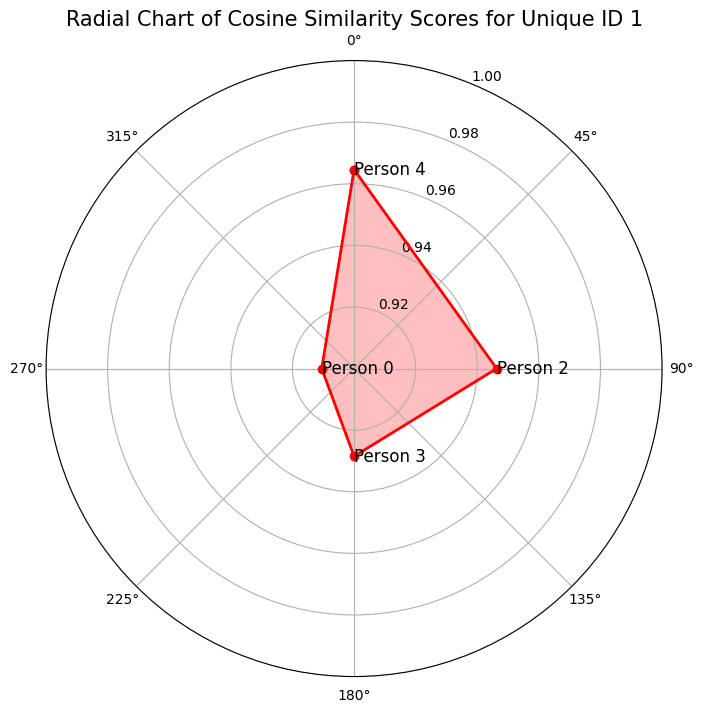

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
test_data_points = ['Person 4', 'Person 2', 'Person 3', 'Person 0']
similarity_scores = [0.9646, 0.9463, 0.9285, 0.9105]

# Number of data points
num_vars = len(test_data_points)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is made in a circular (not oval) shape
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# The bars in the polar plot are made by plotting data on a complete circle, so we need to 'complete the loop'
# and append the start value to the end.
scores = similarity_scores + [similarity_scores[0]]
angles += angles[:1]

# Draw one bar for each score
ax.fill(angles, scores, color='red', alpha=0.25)

# Draw line segment at each angle and radius
ax.plot(angles, scores, linewidth=2, linestyle='solid', marker='o', color='red')

# Format the plot
ax.set_ylim(0.9, 1)  # Set the radius that corresponds to the score ranges

# Set the angle of the first axis at the top and move in a clockwise direction
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw labels for each test data point
for label, angle, dist in zip(test_data_points, angles, scores):
    ax.text(angle, dist, label, horizontalalignment='left', size=12, color='black', verticalalignment='center')

# Title for the visualization
plt.title('Radial Chart of Cosine Similarity Scores for Unique ID 1', size=15)

plt.show()
